# DATA PREPROCESSING

IMPORTING LIBRARIES AND LOADING DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\chiranjeevi.sani\\Downloads\\3.Project\\Kapp_pulp.csv")

In [3]:
data.head()

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01


In [4]:
data.drop_duplicates()
data.dropna(axis=1,thresh=60*3.01,inplace=True)
reduced_data=data.drop("Observation",axis=1)

Here we are Checked and removed

    i) Duplicate row entries (if any)
    
    ii)Features which have null values more than 40% ('SulphidityL-4 ','AAWhiteSt-4 ')
    
    iii) The "Observation" feature which is exceptional for multi variate analysis

CHECKING FOR INCORRECT DATA & CATEGORICAL VARIABLES

In [5]:
reduced_data.dtypes

Y-Kappa            float64
ChipRate           float64
BF-CMratio         float64
BlowFlow           float64
ChipLevel4         float64
T-upperExt-2       float64
T-lowerExt-2       float64
UCZAA              float64
WhiteFlow-4        float64
AA-Wood-4          float64
ChipMoisture-4     float64
SteamFlow-4        float64
Lower-HeatT-3      float64
Upper-HeatT-3      float64
ChipMass-4         float64
WeakLiquorF        float64
BlackFlow-2        float64
WeakWashF          float64
SteamHeatF-3       float64
T-Top-Chips-4      float64
dtype: object

Here we are checking for non-numerical features. As all features are of "float" datatype we can conclude that there are no non-numerical features

In [6]:
reduced_data[reduced_data<0].any()

Y-Kappa            False
ChipRate           False
BF-CMratio         False
BlowFlow           False
ChipLevel4         False
T-upperExt-2       False
T-lowerExt-2       False
UCZAA              False
WhiteFlow-4        False
AA-Wood-4          False
ChipMoisture-4     False
SteamFlow-4        False
Lower-HeatT-3      False
Upper-HeatT-3      False
ChipMass-4         False
WeakLiquorF        False
BlackFlow-2        False
WeakWashF          False
SteamHeatF-3       False
T-Top-Chips-4      False
dtype: bool

Here we checked if any numeric feature have negative values or error entries.As all the features results in false we can conclude that there are no negative values

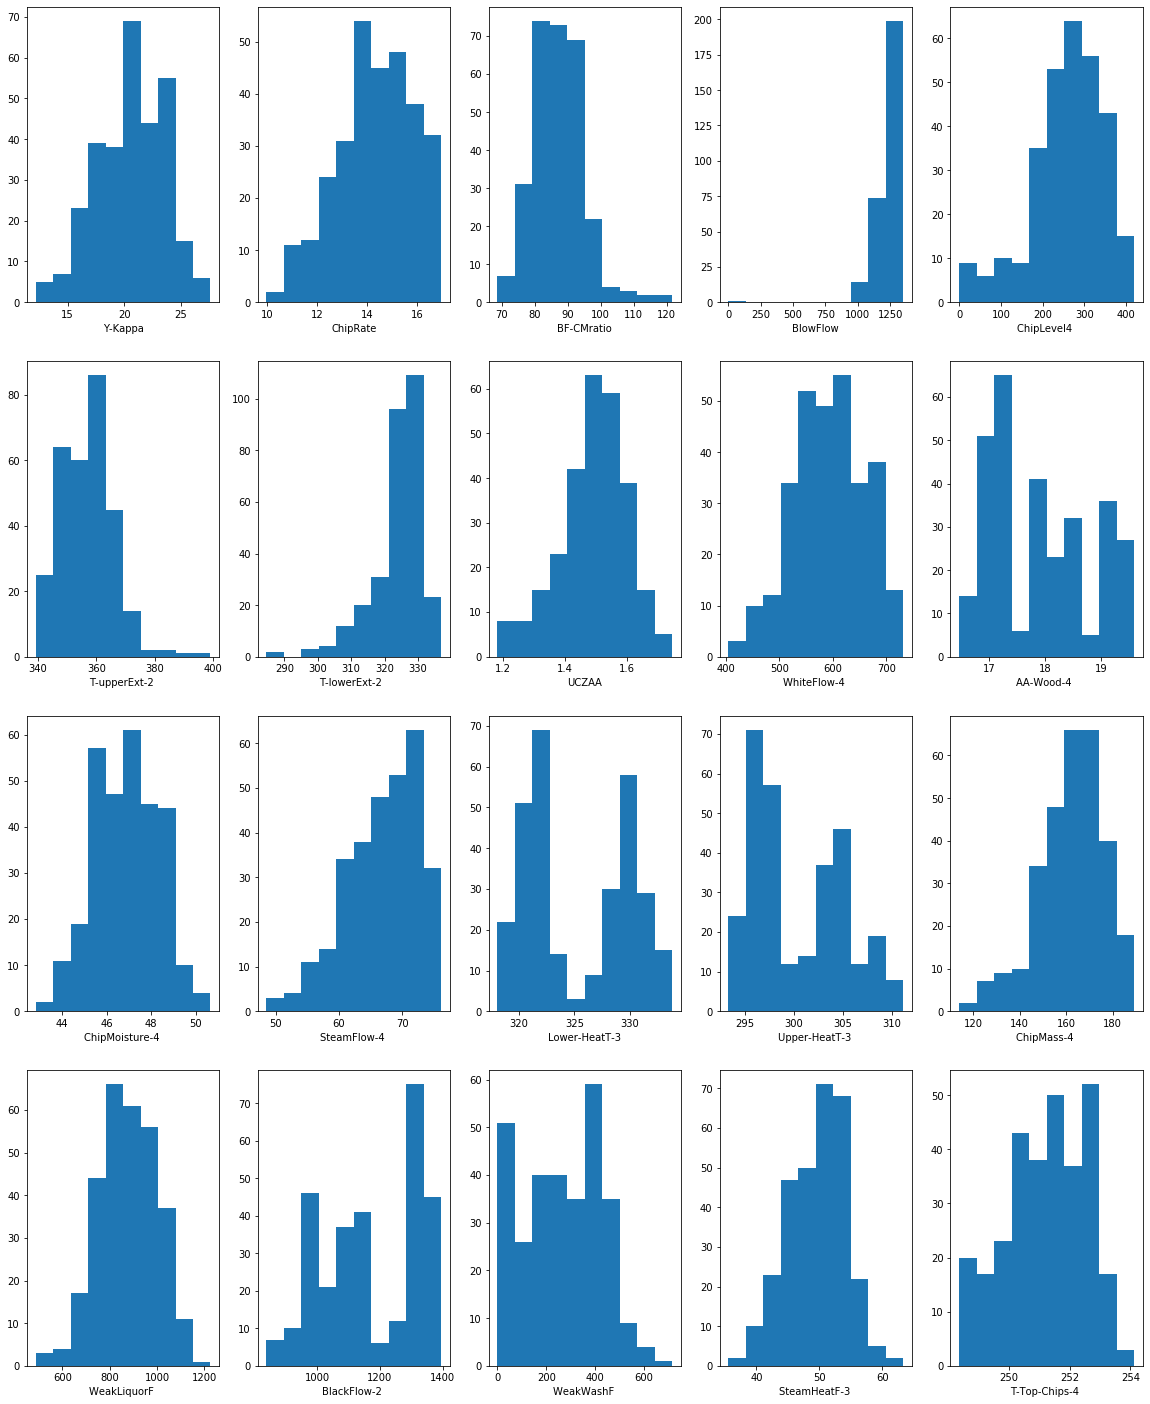

In [7]:
fig,ax=plt.subplots(4,5,figsize=(20,25))
count=0
for i in range(4):
    for j in range(5):
        ax[i,j].hist(reduced_data[reduced_data.columns[count]])
        ax[i,j].set_xlabel(reduced_data.columns[count])
        count+=1
plt.show()

Here we checked for categorical (encoded categorical) features using Histograms. If a histogram contains discrete bars or plots we can conclude that feature as categorical. But here all features have continuos plots.So we can conclude that there are no categorical features.

FINDING AND IMPUTING MISSING VALUES

In [8]:
reduced_data[reduced_data.isin([" ","?","NA"])].any().sum()

0

Here we are checking for missing values in any form of whitespace, ? or NA. As the number of such values is zero we can conclude that there are no such values. 

In [9]:
reduced_data.isnull().sum()

Y-Kappa             0
ChipRate            4
BF-CMratio         14
BlowFlow           13
ChipLevel4          1
T-upperExt-2        1
T-lowerExt-2        1
UCZAA              24
WhiteFlow-4         1
AA-Wood-4           1
ChipMoisture-4      1
SteamFlow-4         1
Lower-HeatT-3       1
Upper-HeatT-3       1
ChipMass-4          1
WeakLiquorF         1
BlackFlow-2         1
WeakWashF           1
SteamHeatF-3        1
T-Top-Chips-4       1
dtype: int64

Here we are checking and counting null values for each feature.As we can see there is atleast one missing values in every feature except "Y-Kappa"

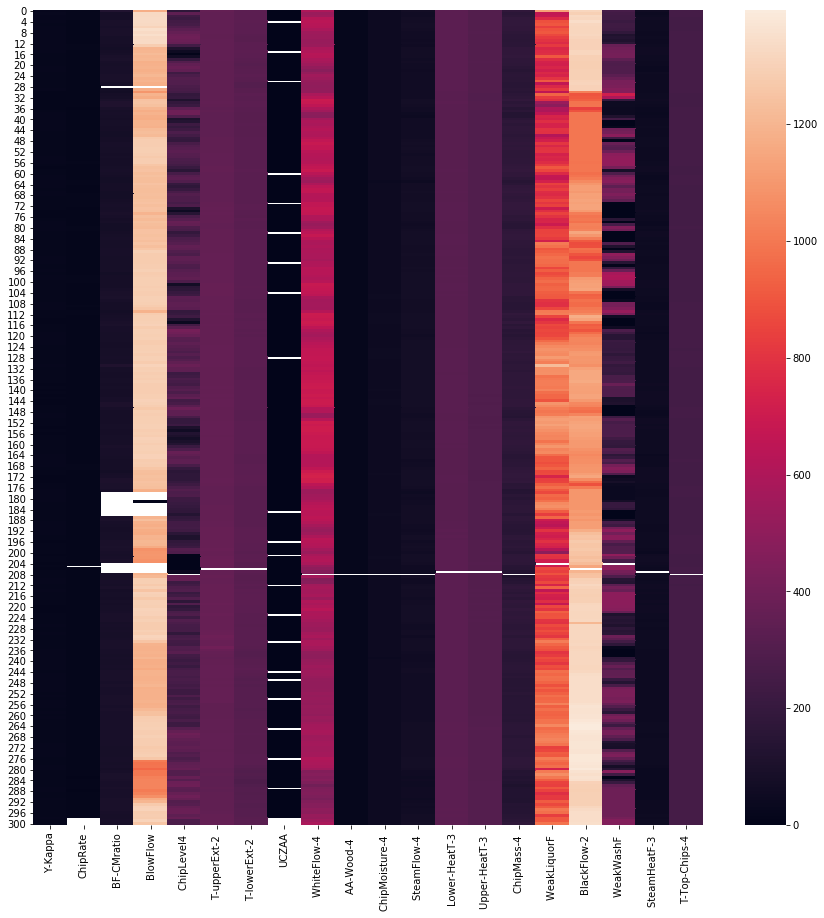

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data=reduced_data)

Here we are showing null values graphically. In heatmap white stripes represents null values.We can see there are some null values in data.

Imputing Data into missing values

In [11]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
for i in reduced_data.columns:
    if reduced_data[i].isnull().sum()>0:
        reduced_data[i]=imputer.fit_transform(reduced_data[[i]])

Here we are replacing the missing (or) null values with median of their respective features.

In [12]:
reduced_data.isnull().sum().sum()

0

Here we are checking again if any null values are there. As the total count of null values is zero, we can conclude that there are no null values.

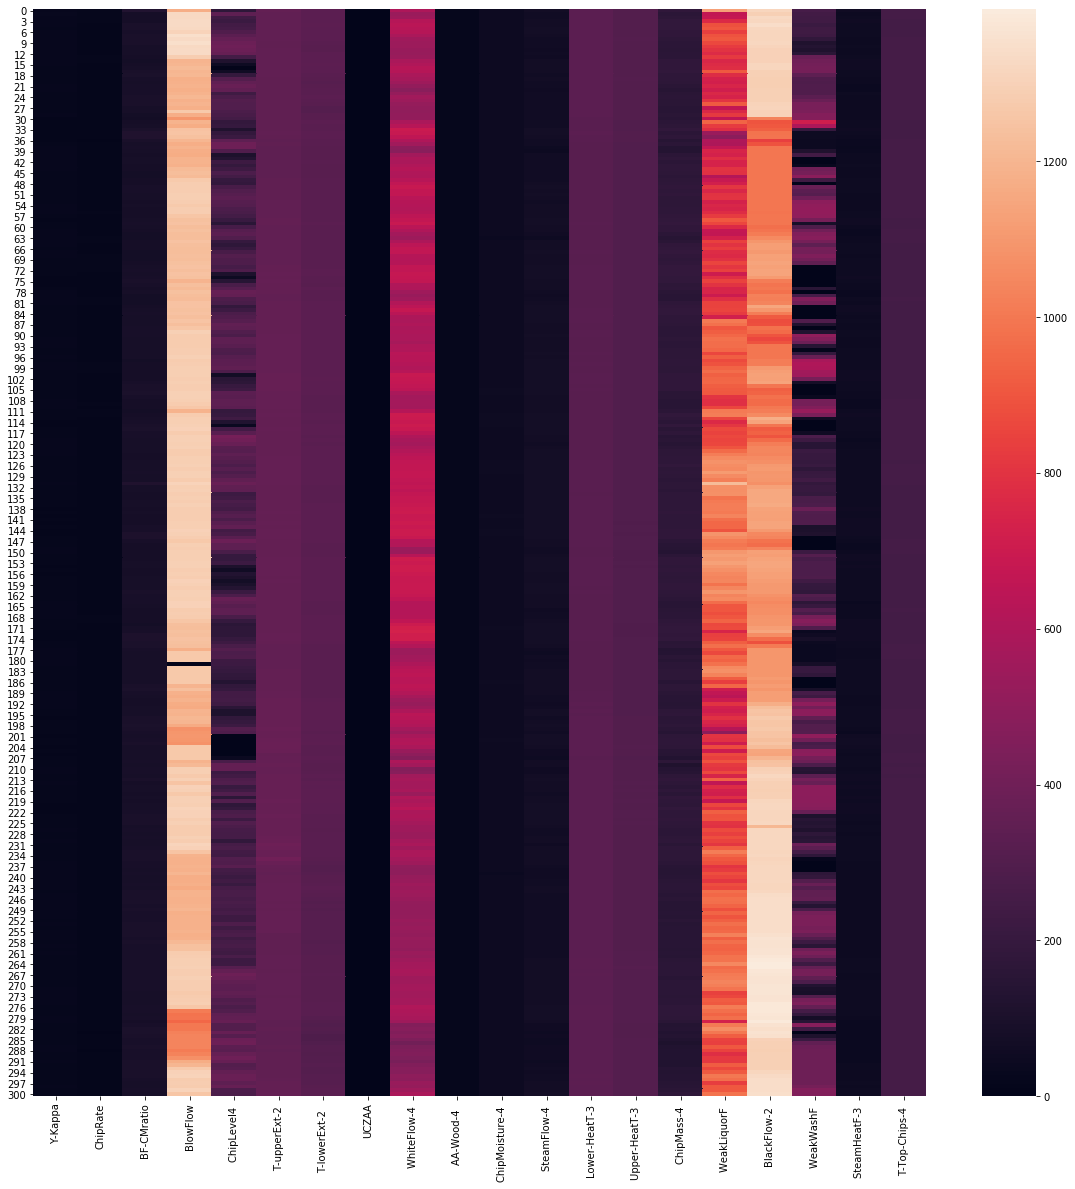

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(reduced_data)

Here again we are showing the null values graphically.As there are no white stripes we can conclude that there are no null values or missing data

DETECTING AND HANDLING OUTLIERS

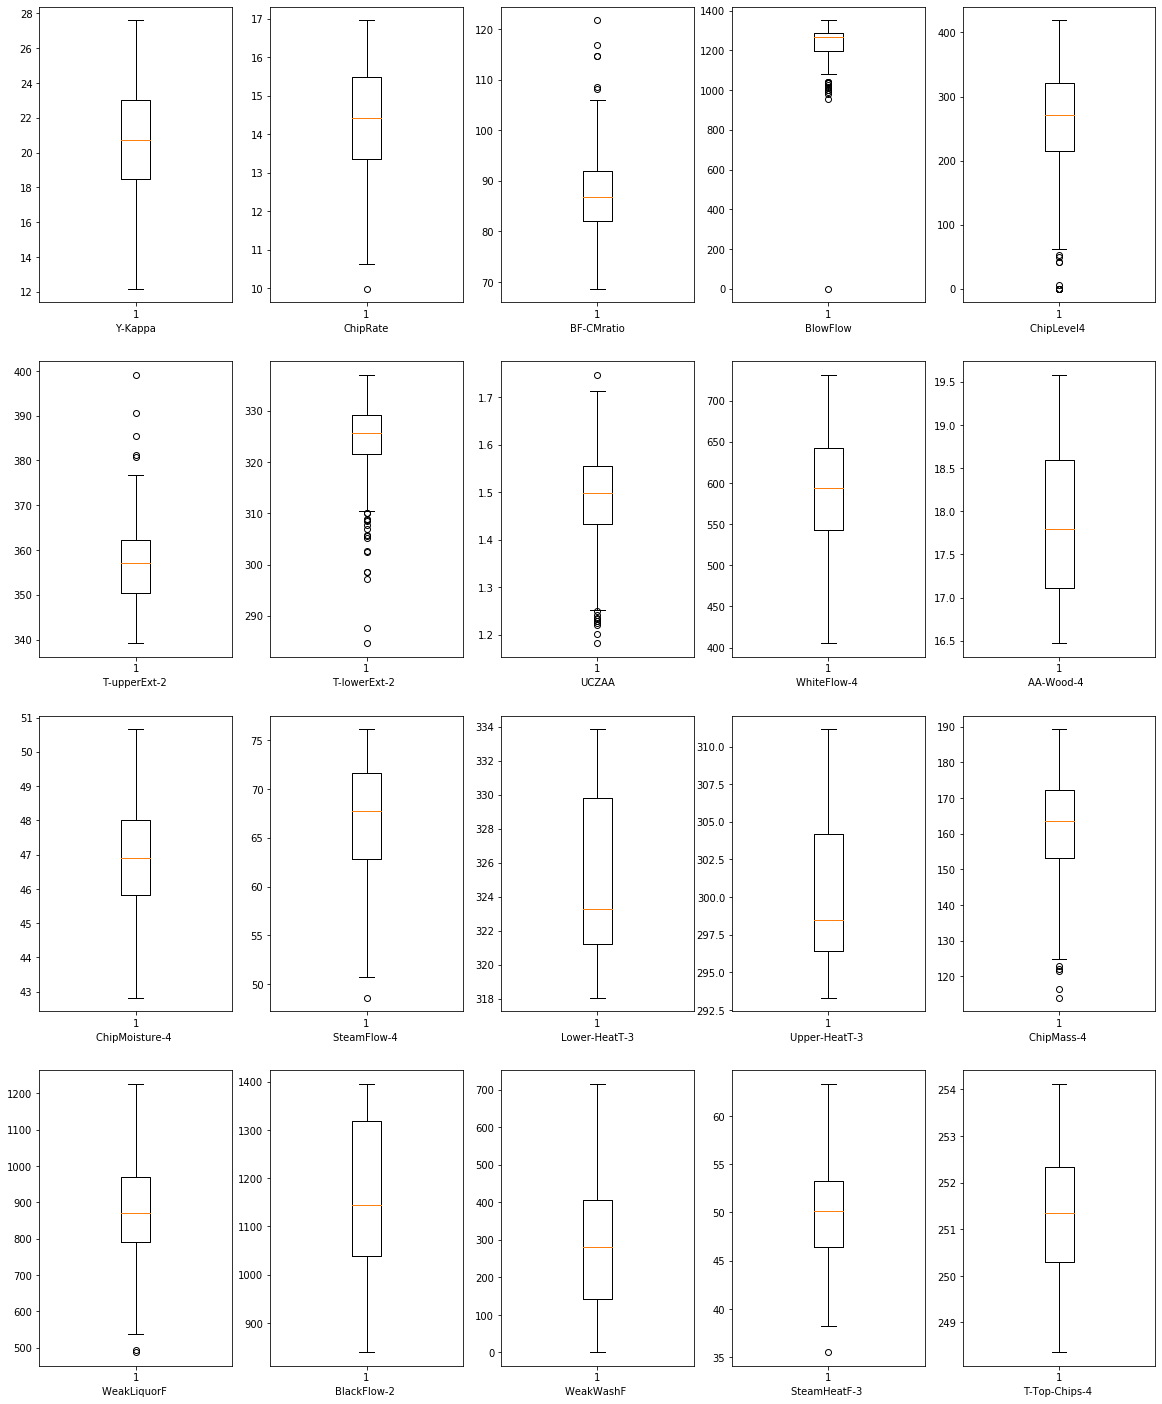

In [14]:
fig,ax=plt.subplots(4,5,figsize=(20,25))
count=0
for i in range(4):
    for j in range(5):
        ax[i,j].boxplot(reduced_data[reduced_data.columns[count]])
        ax[i,j].set_xlabel(reduced_data.columns[count])
        count+=1
        

Here we are checking for outliers. Outliers are extreme values which are in abnormal distance from other data points. Using boxplot we can see the outliers of any feature. The data points which are below the lower whisk(boundary) and above the higher whisk(boundary) of any feature are called as outliers. As we can see there are outliers in some features.

In [22]:
lq=reduced_data.quantile(0.25)
hq=reduced_data.quantile(0.75)
IQR=hq-lq
reduced_data=reduced_data[~((reduced_data<(lq-1.5*IQR))|(reduced_data>(hq+1.5*IQR))).any(axis=1)]
reduced_data.shape

(225, 20)

As there are so many outliers we are deleting them by finding lower whisk and upper whisk using IQR value.

        Inter Quartile Range(IQR)=(75th percentile of the data)-(25th percentile of data)
        lowerwhisk=(25th percentile of the data)-(1.5*IQR)
        higherwhisk=(75th percentile of the data)+(1.5*IQR)

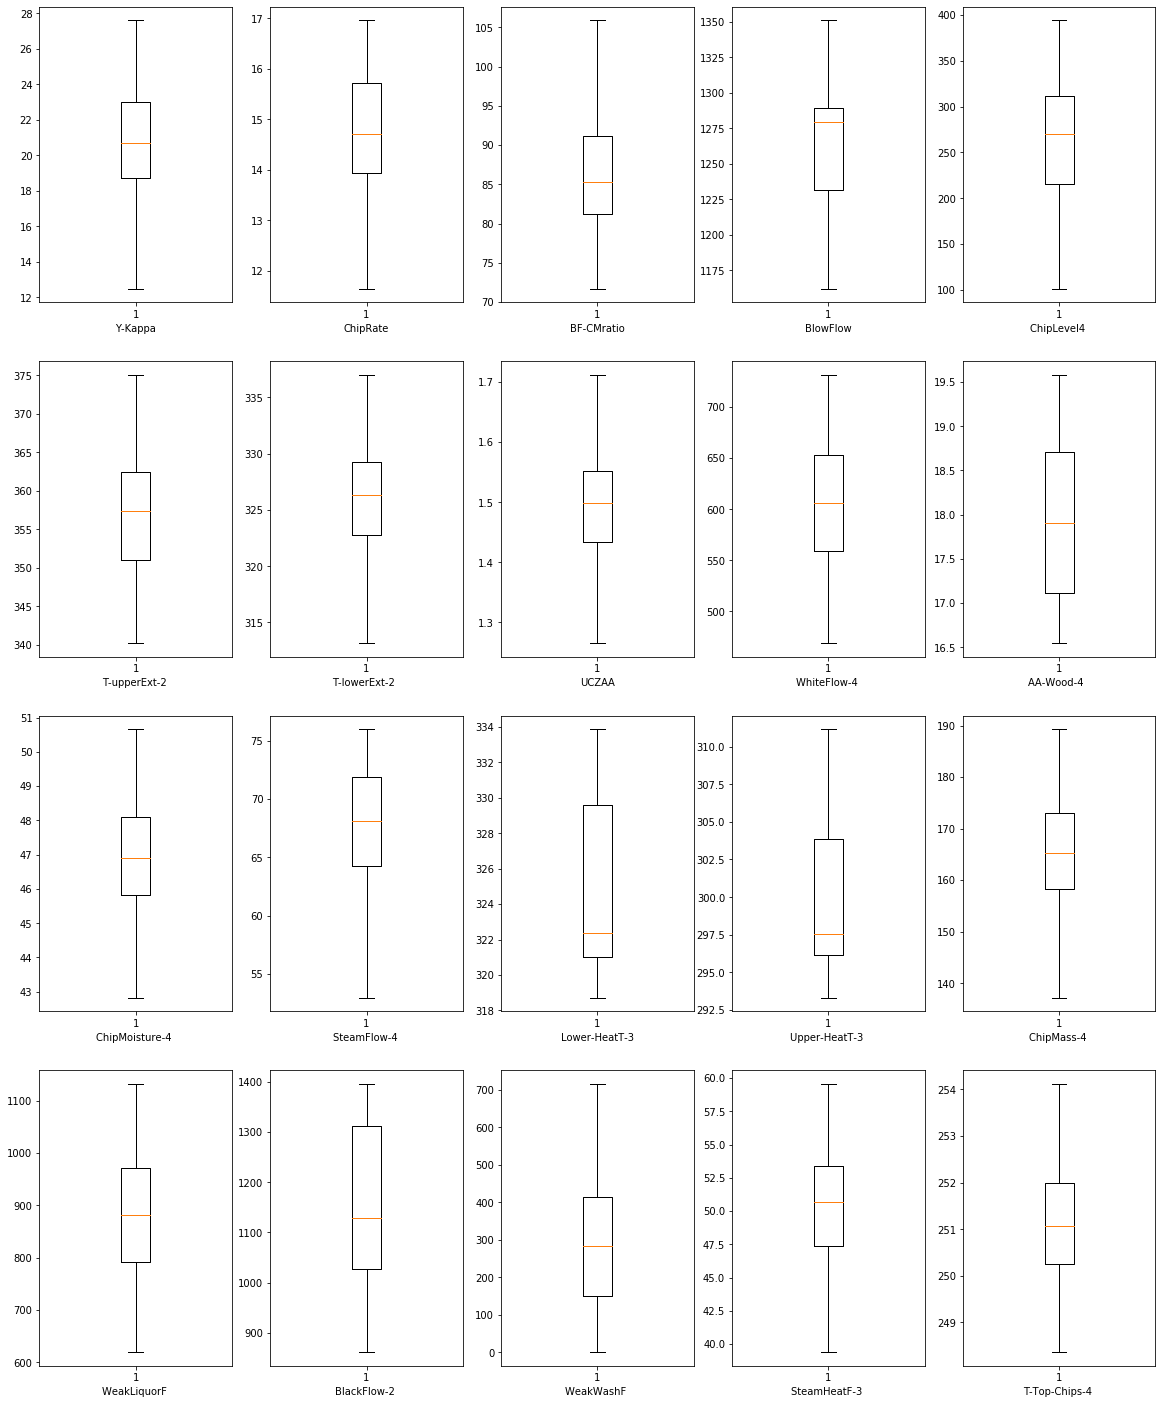

In [23]:
fig,ax=plt.subplots(4,5,figsize=(20,25))
count=0
for i in range(4):
    for j in range(5):
        ax[i,j].boxplot(reduced_data[reduced_data.columns[count]])
        ax[i,j].set_xlabel(reduced_data.columns[count])
        count+=1

Here we are again checking for outliers. As we can see there are no data points below the lower whisk(boundary) and above the higher whisk(boundary).So we can conclude that there are no more outliers

# Checking Normality In Data

Using Shapiro-Wiki test we can find whether the data is normally distributed or not.                 

   NULL HYPOTHESIS:- The data is normally distributed                                                    
   ALTERNATE HYPOTHESIS:- The data is not normally distributed
   
   ***if p>0.05 we accept the NULL HYPOTHESIS

In [24]:
import scipy.stats as st
for i in reduced_data.columns:
    print(reduced_data[i].kurtosis())
    print("Shapiro results for "+i+" are:")
    print("\t"+"test statistic:-",st.shapiro(reduced_data[i])[0])
    print("\t"+"p-value is:-",st.shapiro(reduced_data[i])[1])

-0.3558937112786822
Shapiro results for Y-Kappa are:
	test statistic:- 0.9921994805335999
	p-value is:- 0.2779446840286255
-0.7097073055355558
Shapiro results for ChipRate are:
	test statistic:- 0.9795092940330505
	p-value is:- 0.002369529800489545
-0.290833297837092
Shapiro results for BF-CMratio are:
	test statistic:- 0.9901416301727295
	p-value is:- 0.12906043231487274
-0.6480738942224917
Shapiro results for BlowFlow are:
	test statistic:- 0.9155045747756958
	p-value is:- 5.196187924383366e-10
-0.4637866909168604
Shapiro results for ChipLevel4  are:
	test statistic:- 0.9799458980560303
	p-value is:- 0.0027651614509522915
-0.5944239636890454
Shapiro results for T-upperExt-2  are:
	test statistic:- 0.9895452857017517
	p-value is:- 0.10261715203523636
-0.17739680455619977
Shapiro results for T-lowerExt-2   are:
	test statistic:- 0.9723864793777466
	p-value is:- 0.00022008763335179538
-0.08906052371501127
Shapiro results for UCZAA are:
	test statistic:- 0.9897704720497131
	p-value is:- 

As there are some features with p-value less than 0.05 we can conclude that our data is not normally distriuted

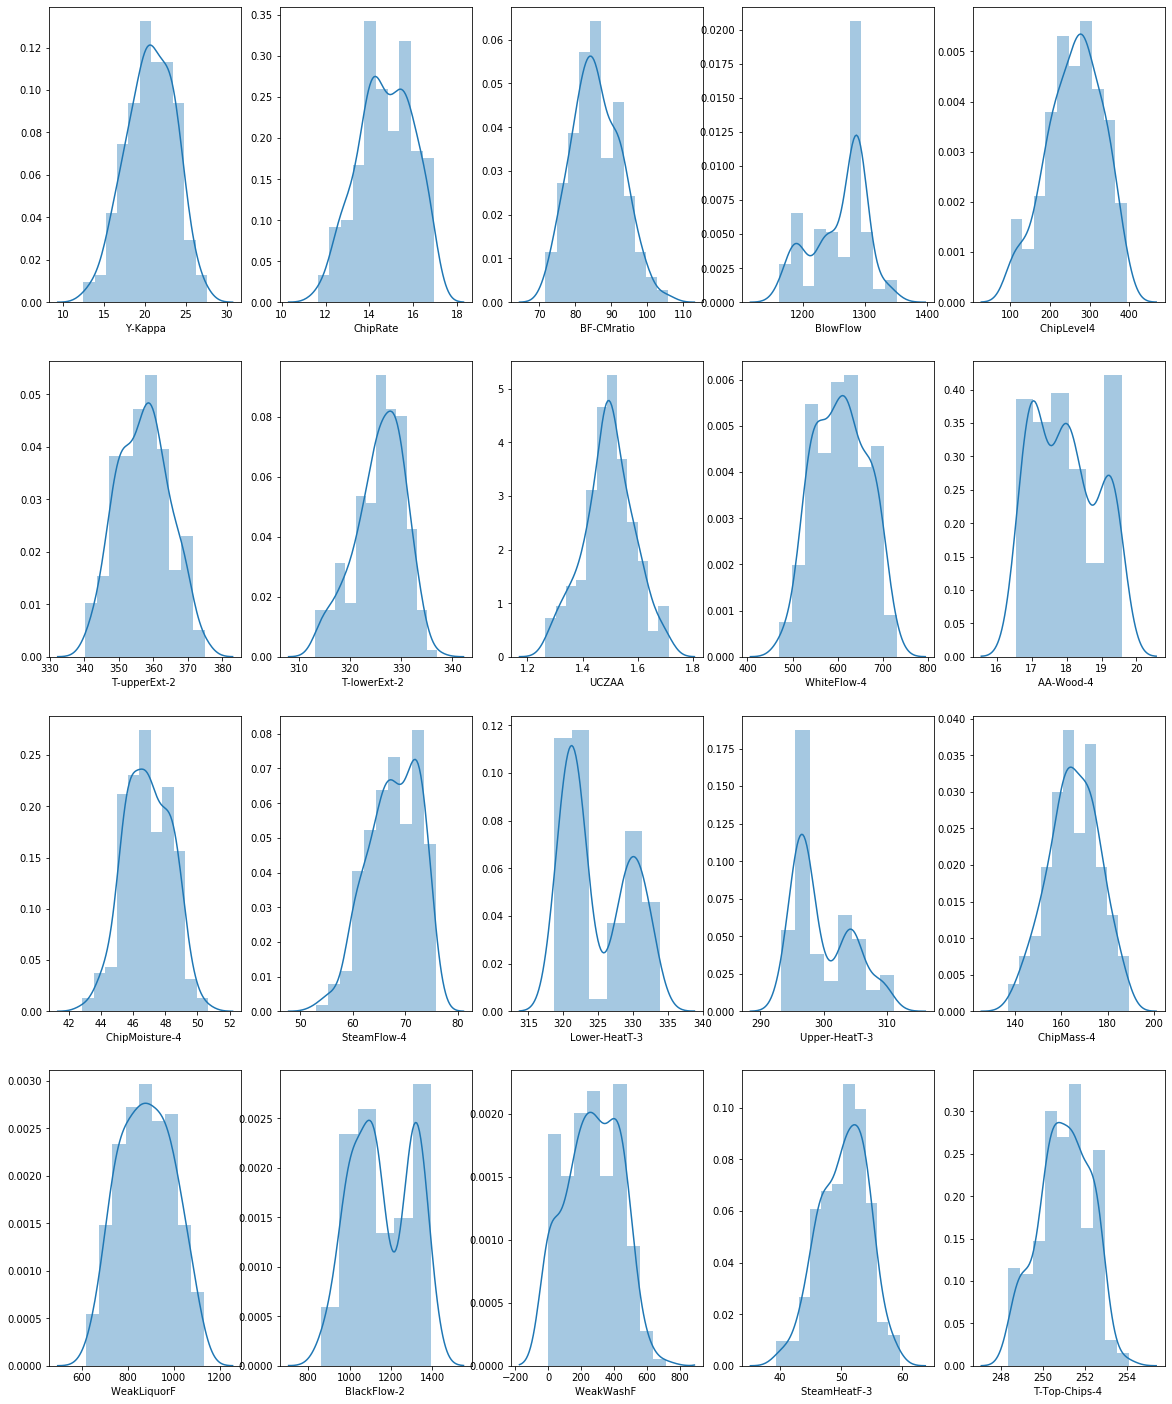

In [25]:
fig,ax=plt.subplots(4,5,figsize=(20,25))
count=0
for i in range(4):
    for j in range(5):
        sns.distplot(reduced_data[reduced_data.columns[count]],ax=ax[i,j])
        ax[i,j].set_xlabel(reduced_data.columns[count])
        count+=1


Using distribution plots we can see whether the data is normally distributed or not. if distribution of data fits a bell shaped curve(Gaussian curve) then we can said that data is normally distributed. As we can see there are some features with high kurtosis and skewness we can conclude that our data is not normally distributed.



Using Normality test we can find whether the data is normally distributed or not.                 

   NULL HYPOTHESIS:- The data is normally distributed                                                    
   ALTERNATE HYPOTHESIS:- The data is not normally distributed
   
   ***if p>0.05 we accept the NULL HYPOTHESIS             


In [26]:
for i in reduced_data.columns:
    print("normal test results for "+i+" are:")
    print("\t"+"test statistic:-",st.normaltest(reduced_data[i])[0])
    print("\t"+"p-value is:-",st.normaltest(reduced_data[i])[1])

normal test results for Y-Kappa are:
	test statistic:- 3.3789540695693967
	p-value is:- 0.1846160465223444
normal test results for ChipRate are:
	test statistic:- 12.393646304913178
	p-value is:- 0.002035888079752964
normal test results for BF-CMratio are:
	test statistic:- 3.539029922504293
	p-value is:- 0.17041562696475712
normal test results for BlowFlow are:
	test statistic:- 18.962742609147718
	p-value is:- 7.625929070606426e-05
normal test results for ChipLevel4  are:
	test statistic:- 7.203366013248884
	p-value is:- 0.027277775117085432
normal test results for T-upperExt-2  are:
	test statistic:- 6.571530121586914
	p-value is:- 0.037411951724198984
normal test results for T-lowerExt-2   are:
	test statistic:- 10.008633134181448
	p-value is:- 0.006708924881831771
normal test results for UCZAA are:
	test statistic:- 0.4273265996128465
	p-value is:- 0.8076202651486795
normal test results for WhiteFlow-4  are:
	test statistic:- 22.70276567312764
	p-value is:- 1.175322559218218e-05
n

As there are some features with p-value less than 0.05 we can conclude that our data is not normally distributed




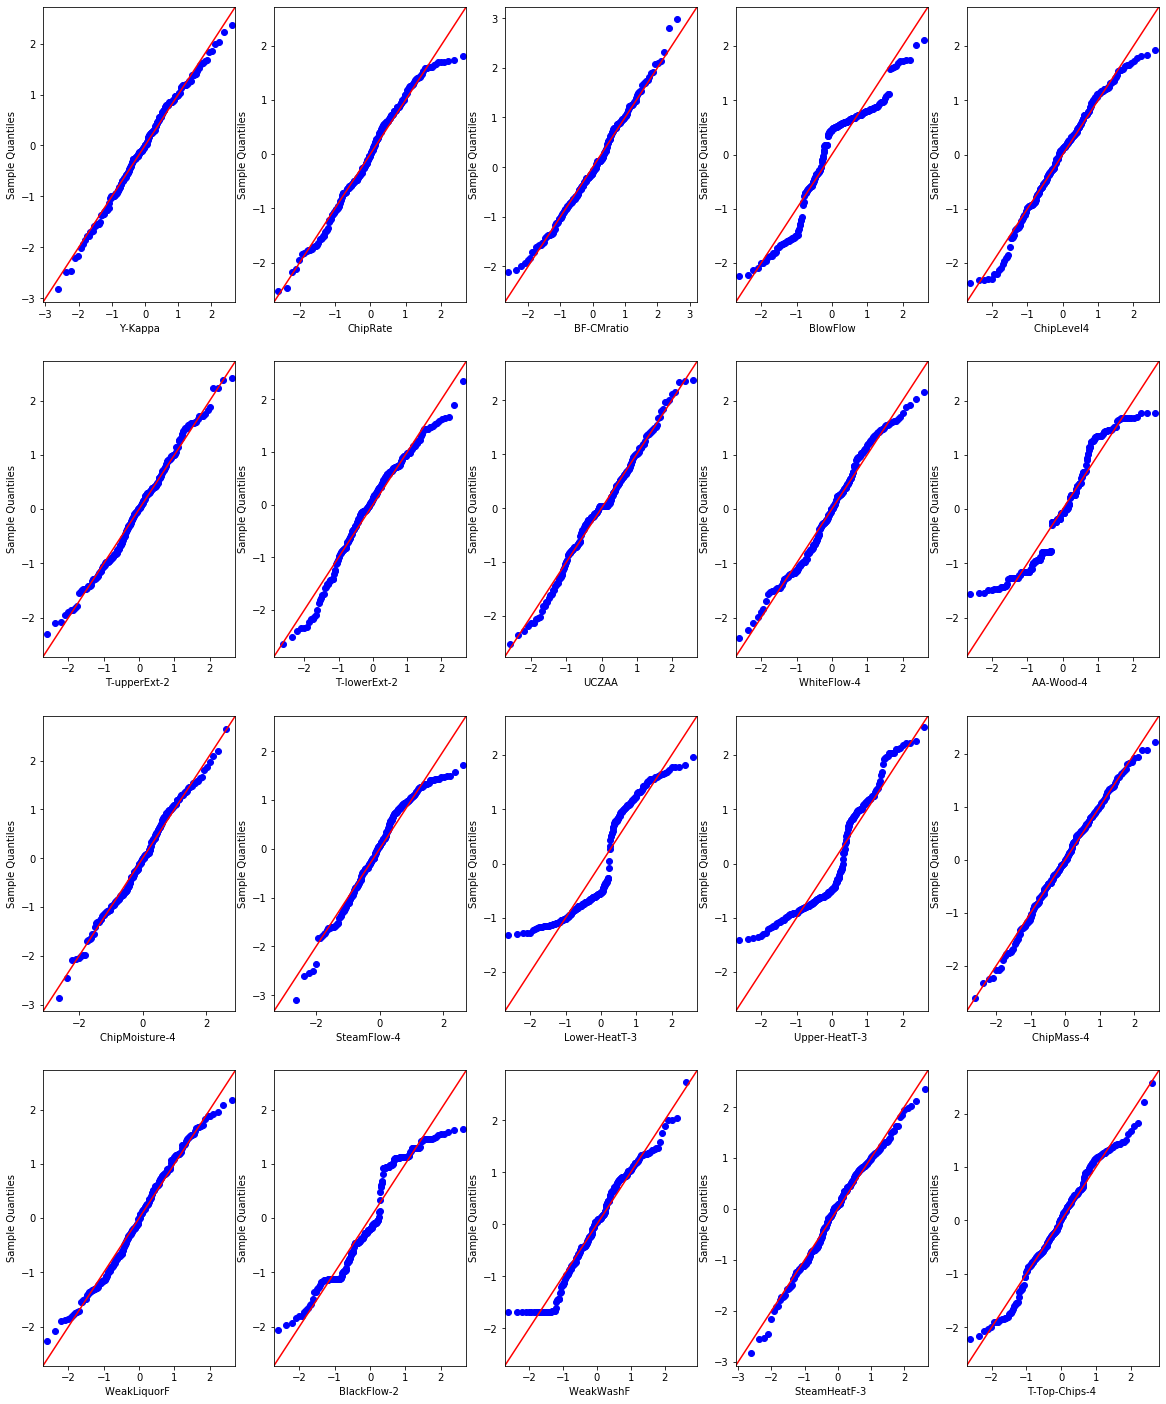

In [27]:
from statsmodels.api import qqplot
fig,ax=plt.subplots(4,5,figsize=(20,25))
count=0
for i in range(4):
    for j in range(5):
        qqplot(reduced_data[reduced_data.columns[count]],fit=True,line="45",ax=ax[i,j])
        ax[i,j].set_xlabel(reduced_data.columns[count])
        count+=1


Using Q-Q plots we can find whether the data is normally distributed or not. If the plot fits like a straight line then we can said that the data is not normally distributed.As we can see most of the features doesn't fit a straight line we can conclude that our data is not normally distributed. 

# FINDING ASSOCIATION OF ALL FEATURES WITH TARGET VARIABLE         

Using scatterplot we can see the linear relationships among the features. Here we are finding linear relationships between our target variables and remaining features. 

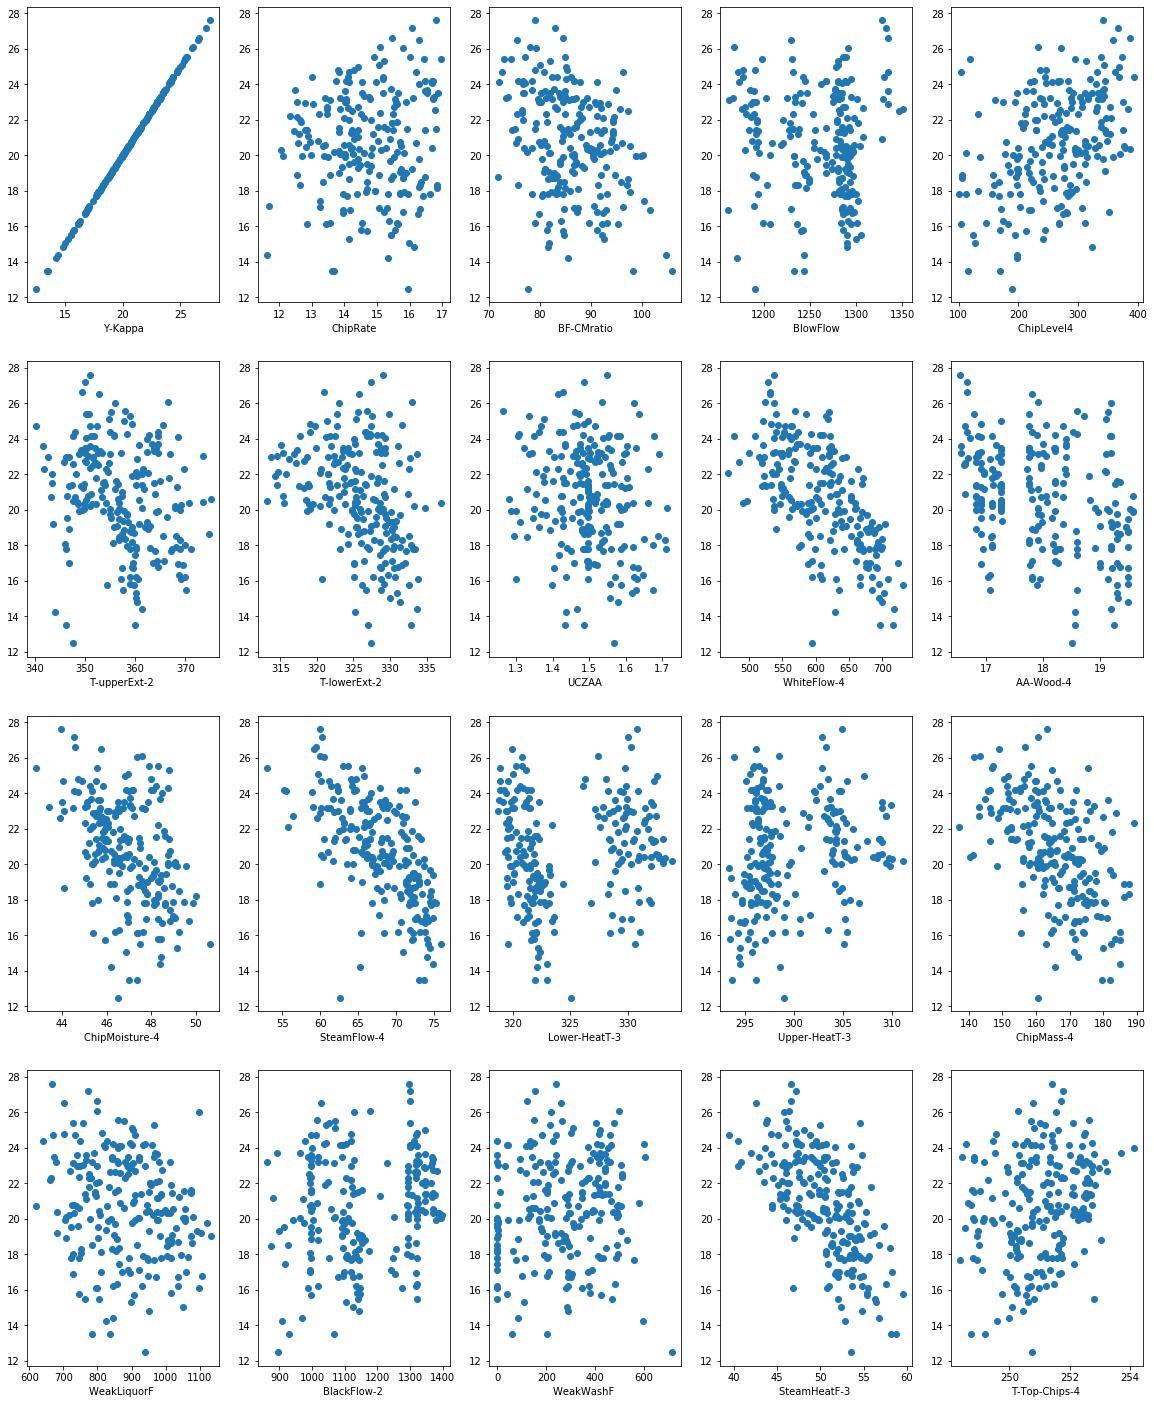

In [28]:
fig,ax=plt.subplots(4,5,figsize=(20,25))
count=0
for i in range(4):
    for j in range(5):
        ax[i,j].scatter(x=reduced_data[reduced_data.columns[count]],y=reduced_data["Y-Kappa"])
        ax[i,j].set_xlabel(reduced_data.columns[count])
        count+=1

#### By observing those graphs we can conclude that

    i) {"ChipRate","ChipLevel4","T-Top-Chips-4"} in positive linear relationship with "Y-Kappa"
    
    ii){"BF-CMratio","T-lowerTxt-2","WhiteFlow-4","ChipMoisture-4","SteamFlow-4","ChipMass-4","WeakLiqourF","SteamHeatF-3"} in negative relationship with "Y-Kappa"

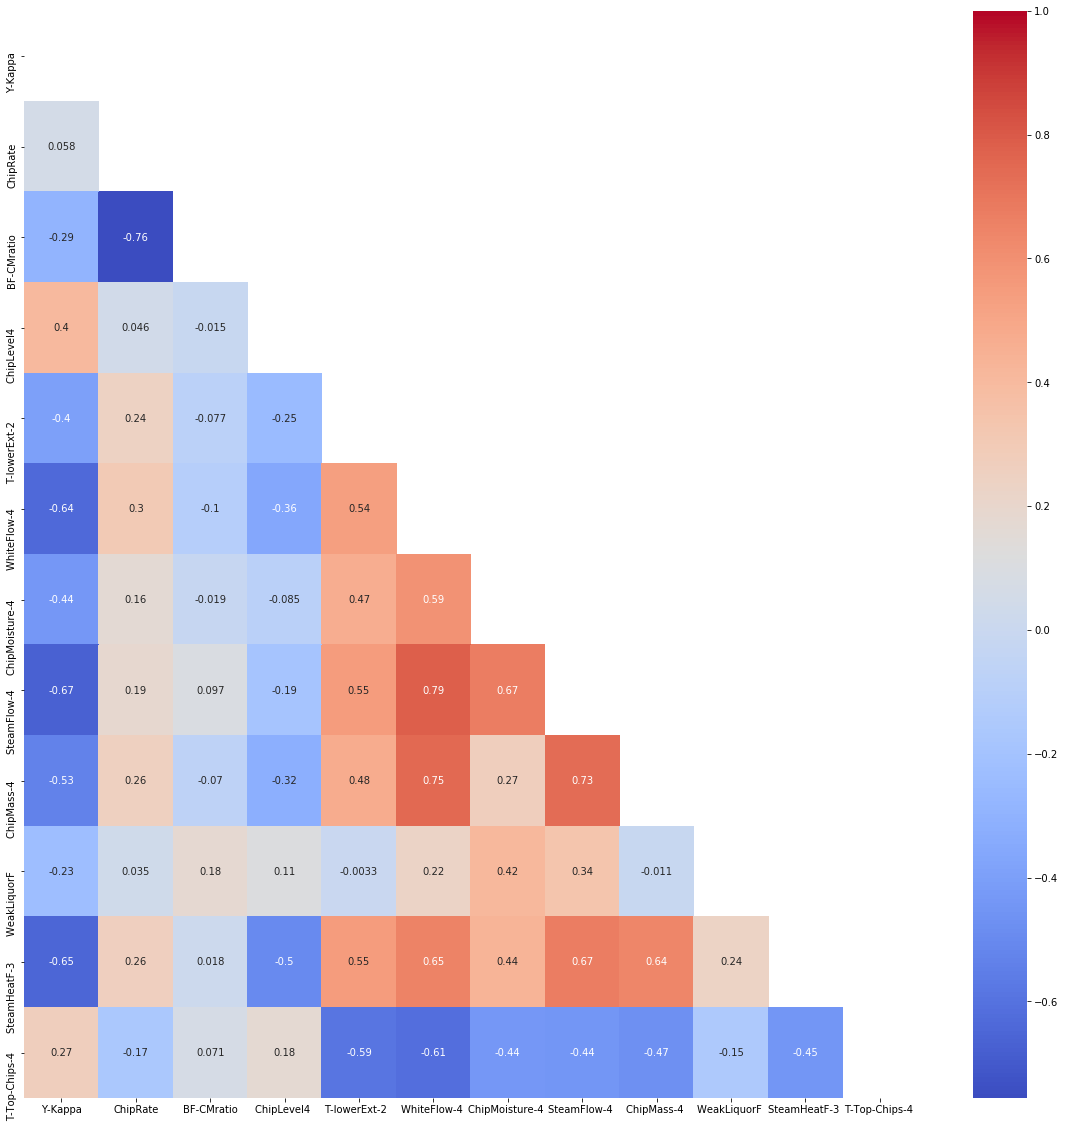

In [29]:
corr=reduced_data[['Y-Kappa', 'ChipRate', 'BF-CMratio', 'ChipLevel4 ', 'T-lowerExt-2  ', 'WhiteFlow-4 ', 'ChipMoisture-4 ', 'SteamFlow-4 ', 'ChipMass-4 ', 'WeakLiquorF ', 'SteamHeatF-3 ', 'T-Top-Chips-4 ']].corr(method="spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,mask=np.triu(corr),cmap="coolwarm")

# MODEL BUILDING WITH NON-NORMALIZED DATA

Based on the linear relationship and correlation values we selected all the features which are effecting the target variable for model building.

In [30]:
reg_data=reduced_data[corr.columns]

Here we defined a function to eliminate dependent features among selected features based on thier correlation values. 

  Step1:- If a feature have correlation with another feature above the threshold we pop out one of them into our list.
        
  Step2:-We repeat this procedure for all selected features except the target variable.
     
  Step3:-After that we have to eliminate all those features from that list. 
        

In [31]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr(method="spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)
correlation(reg_data.drop("Y-Kappa",axis=1),threshold=0.8)

[]

    **As we can see there is an empty list that means there are no dependent features among predictors

Building Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(reg_data.drop("Y-Kappa",axis=1),reg_data["Y-Kappa"])
lr.score(reg_data.drop("Y-Kappa",axis=1),reg_data["Y-Kappa"])

0.6371467511985336

FEATURE SELECTION USING BACKWARD ELIMINATION METHOD

PROCEDURE:

         step1:- Consider all features(except target feature) as predictors for the target feature 
         
         step2:- Built a model with them.
         
         step3:-Find the p-values of each feature for that model
                 
                 if: p>=0.05 that feature has regression cofficient near to 0
                 
                 else:that feature has significant regression coefficient
                 
         step-4: select a feature which has maximum p-value
         
         step-5: if selected feature p-value>0.05 then
                                         
                                         i)Eliminate that feature from features list
                                         
                                         ii)Goto step-2
                 
                 else:- stop and accept the model.
                      

In [33]:
import statsmodels.api as sm
X=sm.add_constant(reduced_data.drop("Y-Kappa",axis=1))
Y=reduced_data["Y-Kappa"]
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     27.24
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           7.56e-46
Time:                        14:13:22   Log-Likelihood:                -418.25
No. Observations:                 225   AIC:                             876.5
Df Residuals:                     205   BIC:                             944.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             210.4900     48.844      4.309      0.000     114.190     306.790
ChipRate            0.1045      0.187      0.558      0.577      -0.265       0.474
BF-CMratio         -0.1369      0.032     -4.340      0.000      -0.199      -0.075
BlowFlow            0.0073      0.004      1.924      0.056      -0.000       0.015
ChipLevel4          0.0007      0.002      0.279      0.780      -0.004       0.006
T-upperExt-2       -0.0247      0.021     -1.182      0.239      -0.066       0.017
T-lowerExt-2        0.0838      0.043      1.941      0.054      -0.001       0.169
UCZAA              -5.9478      1.993     -2.984      0.003      -9.877      -2.018
WhiteFlow-4        -0.0354      0.009     -4.058      0.000      -0.053      -0.018
AA-Wood-4           0.3795      0.411      0.923      0.357      -0.431       1.190
ChipMoisture-4     -0.1272      0.158     -0.808      0.420      -0.438       0.183
SteamFlow-4         0.0266      0.074      0.360      0.719      -0.119       0.172
Lower-HeatT-3      -0.2478      0.113     -2.191      0.030      -0.471      -0.025
Upper-HeatT-3      -0.0054      0.099     -0.054      0.957      -0.200       0.189
ChipMass-4          0.0308      0.028      1.118      0.265      -0.024       0.085
WeakLiquorF        -0.0011      0.001     -0.759      0.449      -0.004       0.002
BlackFlow-2         0.0123      0.002      5.950      0.000       0.008       0.016
WeakWashF          -0.0014      0.001     -1.616      0.108      -0.003       0.000
SteamHeatF-3       -0.2921      0.056     -5.190      0.000      -0.403      -0.181
T-Top-Chips-4      -0.4019      0.142     -2.833      0.005      -0.682      -0.122
==============================================================================
Omnibus:                        2.979   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.039
Skew:                          -0.258   Prob(JB):                        0.219
Kurtosis:                       2.761   Cond. No.                     9.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "Upper-HeatT-3" has highest p-value>0.05.So we are droping that feature from our feature list

In [34]:
X=X.drop("Upper-HeatT-3 ",axis=1)

In [35]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     28.90
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.38e-46
Time:                        14:13:25   Log-Likelihood:                -418.26
No. Observations:                 225   AIC:                             874.5
Df Residuals:                     206   BIC:                             939.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             210.1241     48.261      4.354      0.000     114.975     305.274
ChipRate            0.1055      0.186      0.568      0.571      -0.261       0.472
BF-CMratio         -0.1368      0.031     -4.354      0.000      -0.199      -0.075
BlowFlow            0.0072      0.004      1.965      0.051   -2.28e-05       0.014
ChipLevel4          0.0007      0.002      0.277      0.782      -0.004       0.005
T-upperExt-2       -0.0244      0.020     -1.209      0.228      -0.064       0.015
T-lowerExt-2        0.0847      0.040      2.116      0.036       0.006       0.164
UCZAA              -5.9376      1.979     -3.000      0.003      -9.840      -2.035
WhiteFlow-4        -0.0354      0.009     -4.083      0.000      -0.052      -0.018
AA-Wood-4           0.3820      0.408      0.937      0.350      -0.422       1.186
ChipMoisture-4     -0.1268      0.157     -0.808      0.420      -0.436       0.183
SteamFlow-4         0.0256      0.071      0.359      0.720      -0.115       0.166
Lower-HeatT-3      -0.2519      0.085     -2.965      0.003      -0.419      -0.084
ChipMass-4          0.0309      0.027      1.126      0.261      -0.023       0.085
WeakLiquorF        -0.0011      0.001     -0.762      0.447      -0.004       0.002
BlackFlow-2         0.0123      0.002      5.976      0.000       0.008       0.016
WeakWashF          -0.0014      0.001     -1.647      0.101      -0.003       0.000
SteamHeatF-3       -0.2923      0.056     -5.222      0.000      -0.403      -0.182
T-Top-Chips-4      -0.4032      0.139     -2.892      0.004      -0.678      -0.128
==============================================================================
Omnibus:                        2.971   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.031
Skew:                          -0.258   Prob(JB):                        0.220
Kurtosis:                       2.759   Cond. No.                     9.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "ChipLevel4" has highest p-value>0.05. So we are droping that feature from our feature list

In [36]:
X=X.drop("ChipLevel4 ",axis=1)

In [37]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     30.73
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.54e-47
Time:                        14:13:27   Log-Likelihood:                -418.30
No. Observations:                 225   AIC:                             872.6
Df Residuals:                     207   BIC:                             934.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             209.4570     48.093      4.355      0.000     114.641     304.273
ChipRate            0.1117      0.184      0.606      0.545      -0.251       0.475
BF-CMratio         -0.1363      0.031     -4.355      0.000      -0.198      -0.075
BlowFlow            0.0076      0.003      2.286      0.023       0.001       0.014
T-upperExt-2       -0.0250      0.020     -1.245      0.214      -0.065       0.015
T-lowerExt-2        0.0847      0.040      2.123      0.035       0.006       0.163
UCZAA              -6.0624      1.923     -3.153      0.002      -9.853      -2.271
WhiteFlow-4        -0.0358      0.009     -4.203      0.000      -0.053      -0.019
AA-Wood-4           0.3918      0.405      0.967      0.335      -0.407       1.190
ChipMoisture-4     -0.1232      0.156     -0.790      0.431      -0.431       0.184
SteamFlow-4         0.0283      0.071      0.401      0.689      -0.111       0.167
Lower-HeatT-3      -0.2491      0.084     -2.960      0.003      -0.415      -0.083
ChipMass-4          0.0315      0.027      1.151      0.251      -0.022       0.085
WeakLiquorF        -0.0011      0.001     -0.765      0.445      -0.004       0.002
BlackFlow-2         0.0123      0.002      5.987      0.000       0.008       0.016
WeakWashF          -0.0014      0.001     -1.627      0.105      -0.003       0.000
SteamHeatF-3       -0.2992      0.050     -5.977      0.000      -0.398      -0.200
T-Top-Chips-4      -0.4047      0.139     -2.911      0.004      -0.679      -0.131
==============================================================================
Omnibus:                        2.978   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.031
Skew:                          -0.255   Prob(JB):                        0.220
Kurtosis:                       2.750   Cond. No.                     9.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

          ** Among all features "ChipRate" has highest p-value>0.05.So we are droping that feature from our feature list

In [38]:
X=X.drop("ChipRate",axis=1)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     32.73
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           5.22e-48
Time:                        14:13:29   Log-Likelihood:                -418.50
No. Observations:                 225   AIC:                             871.0
Df Residuals:                     208   BIC:                             929.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             211.8924     47.853      4.428      0.000     117.554     306.231
BF-CMratio         -0.1492      0.023     -6.501      0.000      -0.194      -0.104
BlowFlow            0.0087      0.003      2.983      0.003       0.003       0.014
T-upperExt-2       -0.0262      0.020     -1.317      0.189      -0.066       0.013
T-lowerExt-2        0.0885      0.039      2.249      0.026       0.011       0.166
UCZAA              -5.7774      1.862     -3.103      0.002      -9.448      -2.107
WhiteFlow-4        -0.0357      0.009     -4.195      0.000      -0.052      -0.019
AA-Wood-4           0.3472      0.398      0.873      0.384      -0.437       1.131
ChipMoisture-4     -0.1199      0.156     -0.770      0.442      -0.427       0.187
SteamFlow-4         0.0285      0.070      0.405      0.686      -0.110       0.167
Lower-HeatT-3      -0.2616      0.081     -3.210      0.002      -0.422      -0.101
ChipMass-4          0.0312      0.027      1.141      0.255      -0.023       0.085
WeakLiquorF        -0.0009      0.001     -0.672      0.502      -0.004       0.002
BlackFlow-2         0.0124      0.002      6.022      0.000       0.008       0.016
WeakWashF          -0.0014      0.001     -1.609      0.109      -0.003       0.000
SteamHeatF-3       -0.2958      0.050     -5.955      0.000      -0.394      -0.198
T-Top-Chips-4      -0.3962      0.138     -2.869      0.005      -0.668      -0.124
==============================================================================
Omnibus:                        3.026   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                3.066
Skew:                          -0.254   Prob(JB):                        0.216
Kurtosis:                       2.737   Cond. No.                     9.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "SteamFlow-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [39]:
X=X.drop("SteamFlow-4 ",axis=1)

In [40]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     35.04
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           9.36e-49
Time:                        14:13:32   Log-Likelihood:                -418.59
No. Observations:                 225   AIC:                             869.2
Df Residuals:                     209   BIC:                             923.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             208.3761     46.962      4.437      0.000     115.796     300.956
BF-CMratio         -0.1488      0.023     -6.503      0.000      -0.194      -0.104
BlowFlow            0.0088      0.003      3.040      0.003       0.003       0.014
T-upperExt-2       -0.0234      0.019     -1.257      0.210      -0.060       0.013
T-lowerExt-2        0.0858      0.039      2.216      0.028       0.009       0.162
UCZAA              -5.8122      1.856     -3.132      0.002      -9.471      -2.153
WhiteFlow-4        -0.0338      0.007     -4.755      0.000      -0.048      -0.020
AA-Wood-4           0.2863      0.367      0.779      0.437      -0.438       1.010
ChipMoisture-4     -0.0795      0.119     -0.667      0.505      -0.314       0.155
Lower-HeatT-3      -0.2543      0.079     -3.206      0.002      -0.411      -0.098
ChipMass-4          0.0334      0.027      1.250      0.213      -0.019       0.086
WeakLiquorF        -0.0008      0.001     -0.595      0.553      -0.003       0.002
BlackFlow-2         0.0122      0.002      6.059      0.000       0.008       0.016
WeakWashF          -0.0013      0.001     -1.582      0.115      -0.003       0.000
SteamHeatF-3       -0.2969      0.049     -6.002      0.000      -0.394      -0.199
T-Top-Chips-4      -0.3936      0.138     -2.859      0.005      -0.665      -0.122
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.171
Skew:                          -0.261   Prob(JB):                        0.205
Kurtosis:                       2.744   Cond. No.                     9.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "WeakLiquorF" has highest p-value>0.05.So we are droping that feature from our feature list

In [41]:
X=X.drop('WeakLiquorF ',axis=1)

In [42]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     37.63
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.77e-49
Time:                        14:13:36   Log-Likelihood:                -418.78
No. Observations:                 225   AIC:                             867.6
Df Residuals:                     210   BIC:                             918.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             210.1081     46.800      4.490      0.000     117.851     302.366
BF-CMratio         -0.1495      0.023     -6.549      0.000      -0.194      -0.104
BlowFlow            0.0082      0.003      3.029      0.003       0.003       0.013
T-upperExt-2       -0.0255      0.018     -1.391      0.166      -0.062       0.011
T-lowerExt-2        0.0929      0.037      2.526      0.012       0.020       0.165
UCZAA              -5.5291      1.791     -3.087      0.002      -9.060      -1.998
WhiteFlow-4        -0.0340      0.007     -4.798      0.000      -0.048      -0.020
AA-Wood-4           0.2273      0.353      0.643      0.521      -0.469       0.924
ChipMoisture-4     -0.0887      0.118     -0.753      0.453      -0.321       0.144
Lower-HeatT-3      -0.2619      0.078     -3.350      0.001      -0.416      -0.108
ChipMass-4          0.0340      0.027      1.279      0.202      -0.018       0.087
BlackFlow-2         0.0121      0.002      6.041      0.000       0.008       0.016
WeakWashF          -0.0014      0.001     -1.699      0.091      -0.003       0.000
SteamHeatF-3       -0.3002      0.049     -6.113      0.000      -0.397      -0.203
T-Top-Chips-4      -0.3910      0.137     -2.846      0.005      -0.662      -0.120
==============================================================================
Omnibus:                        2.929   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.988
Skew:                          -0.255   Prob(JB):                        0.224
Kurtosis:                       2.758   Cond. No.                     8.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "AA-Wood-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [43]:
X=X.drop("AA-Wood-4  ",axis=1)

In [44]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     40.61
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           3.33e-50
Time:                        14:13:39   Log-Likelihood:                -419.00
No. Observations:                 225   AIC:                             866.0
Df Residuals:                     211   BIC:                             913.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             225.0488     40.578      5.546      0.000     145.059     305.038
BF-CMratio         -0.1510      0.023     -6.664      0.000      -0.196      -0.106
BlowFlow            0.0081      0.003      3.006      0.003       0.003       0.013
T-upperExt-2       -0.0249      0.018     -1.363      0.174      -0.061       0.011
T-lowerExt-2        0.0879      0.036      2.449      0.015       0.017       0.159
UCZAA              -5.3877      1.775     -3.035      0.003      -8.887      -1.888
WhiteFlow-4        -0.0311      0.005     -5.716      0.000      -0.042      -0.020
ChipMoisture-4     -0.0585      0.108     -0.542      0.589      -0.271       0.154
Lower-HeatT-3      -0.2792      0.073     -3.811      0.000      -0.424      -0.135
ChipMass-4          0.0225      0.020      1.145      0.253      -0.016       0.061
BlackFlow-2         0.0122      0.002      6.120      0.000       0.008       0.016
WeakWashF          -0.0015      0.001     -1.754      0.081      -0.003       0.000
SteamHeatF-3       -0.2989      0.049     -6.101      0.000      -0.395      -0.202
T-Top-Chips-4      -0.4118      0.133     -3.088      0.002      -0.675      -0.149
==============================================================================
Omnibus:                        3.264   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.258
Skew:                          -0.255   Prob(JB):                        0.196
Kurtosis:                       2.705   Cond. No.                     7.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "ChipMoisture-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [45]:
X=X.drop("ChipMoisture-4 ",axis=1)

In [46]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     44.11
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           5.66e-51
Time:                        14:13:42   Log-Likelihood:                -419.15
No. Observations:                 225   AIC:                             864.3
Df Residuals:                     212   BIC:                             908.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            224.9227     40.509      5.552      0.000     145.070     304.775
BF-CMratio        -0.1500      0.023     -6.653      0.000      -0.194      -0.106
BlowFlow           0.0080      0.003      2.998      0.003       0.003       0.013
T-upperExt-2      -0.0270      0.018     -1.517      0.131      -0.062       0.008
T-lowerExt-2       0.0871      0.036      2.433      0.016       0.017       0.158
UCZAA             -5.3552      1.771     -3.023      0.003      -8.847      -1.864
WhiteFlow-4       -0.0324      0.005     -6.613      0.000      -0.042      -0.023
Lower-HeatT-3     -0.2847      0.072     -3.929      0.000      -0.428      -0.142
ChipMass-4         0.0266      0.018      1.464      0.145      -0.009       0.062
BlackFlow-2        0.0124      0.002      6.240      0.000       0.008       0.016
WeakWashF         -0.0014      0.001     -1.696      0.091      -0.003       0.000
SteamHeatF-3      -0.3015      0.049     -6.196      0.000      -0.397      -0.206
T-Top-Chips-4     -0.4112      0.133     -3.089      0.002      -0.674      -0.149
==============================================================================
Omnibus:                        3.473   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.347
Skew:                          -0.245   Prob(JB):                        0.188
Kurtosis:                       2.657   Cond. No.                     7.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "ChipMass-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [47]:
X=X.drop("ChipMass-4 ",axis=1)

In [48]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     47.67
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.27e-51
Time:                        14:13:46   Log-Likelihood:                -420.29
No. Observations:                 225   AIC:                             864.6
Df Residuals:                     213   BIC:                             905.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            215.6254     40.116      5.375      0.000     136.551     294.700
BF-CMratio        -0.1592      0.022     -7.332      0.000      -0.202      -0.116
BlowFlow           0.0075      0.003      2.803      0.006       0.002       0.013
T-upperExt-2      -0.0316      0.018     -1.801      0.073      -0.066       0.003
T-lowerExt-2       0.0921      0.036      2.577      0.011       0.022       0.162
UCZAA             -5.7115      1.759     -3.247      0.001      -9.179      -2.244
WhiteFlow-4       -0.0278      0.004     -7.375      0.000      -0.035      -0.020
Lower-HeatT-3     -0.2383      0.065     -3.647      0.000      -0.367      -0.109
BlackFlow-2        0.0118      0.002      6.060      0.000       0.008       0.016
WeakWashF         -0.0016      0.001     -1.910      0.057      -0.003       5e-05
SteamHeatF-3      -0.2933      0.048     -6.052      0.000      -0.389      -0.198
T-Top-Chips-4     -0.4186      0.133     -3.138      0.002      -0.681      -0.156
==============================================================================
Omnibus:                        3.458   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                3.511
Skew:                          -0.279   Prob(JB):                        0.173
Kurtosis:                       2.749   Cond. No.                     7.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "T-upperExt-2" has highest p-value>0.05.So we are droping that feature from our feature list

In [49]:
X=X.drop("T-upperExt-2 ",axis=1)

In [50]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     51.58
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.50e-51
Time:                        14:13:49   Log-Likelihood:                -421.99
No. Observations:                 225   AIC:                             866.0
Df Residuals:                     214   BIC:                             903.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            215.7346     40.325      5.350      0.000     136.249     295.220
BF-CMratio        -0.1627      0.022     -7.485      0.000      -0.206      -0.120
BlowFlow           0.0077      0.003      2.889      0.004       0.002       0.013
T-lowerExt-2       0.0644      0.032      1.986      0.048       0.000       0.128
UCZAA             -5.8176      1.767     -3.292      0.001      -9.301      -2.334
WhiteFlow-4       -0.0274      0.004     -7.257      0.000      -0.035      -0.020
Lower-HeatT-3     -0.2472      0.065     -3.775      0.000      -0.376      -0.118
BlackFlow-2        0.0118      0.002      5.998      0.000       0.008       0.016
WeakWashF         -0.0015      0.001     -1.880      0.061      -0.003    7.45e-05
SteamHeatF-3      -0.2959      0.049     -6.075      0.000      -0.392      -0.200
T-Top-Chips-4     -0.4161      0.134     -3.103      0.002      -0.680      -0.152
==============================================================================
Omnibus:                        2.956   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                3.022
Skew:                          -0.260   Prob(JB):                        0.221
Kurtosis:                       2.773   Cond. No.                     7.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

        ** Among all features "WeakWashF" has highest p-value>0.05.So we are droping that feature from our feature list

In [51]:
X=X.drop("WeakWashF ",axis=1)

In [52]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     56.25
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.09e-51
Time:                        14:13:51   Log-Likelihood:                -423.83
No. Observations:                 225   AIC:                             867.7
Df Residuals:                     215   BIC:                             901.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            221.0800     40.461      5.464      0.000     141.328     300.832
BF-CMratio        -0.1445      0.020     -7.381      0.000      -0.183      -0.106
BlowFlow           0.0085      0.003      3.217      0.001       0.003       0.014
T-lowerExt-2       0.0666      0.033      2.042      0.042       0.002       0.131
UCZAA             -6.4622      1.744     -3.706      0.000      -9.900      -3.025
WhiteFlow-4       -0.0273      0.004     -7.172      0.000      -0.035      -0.020
Lower-HeatT-3     -0.2774      0.064     -4.343      0.000      -0.403      -0.152
BlackFlow-2        0.0125      0.002      6.411      0.000       0.009       0.016
SteamHeatF-3      -0.2983      0.049     -6.091      0.000      -0.395      -0.202
T-Top-Chips-4     -0.4123      0.135     -3.058      0.003      -0.678      -0.147
==============================================================================
Omnibus:                        2.785   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.850
Skew:                          -0.260   Prob(JB):                        0.240
Kurtosis:                       2.819   Cond. No.                     7.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    --> As we can see there are no features with p-value>=0.05. So we can include all these features to design a model

BUILDING LINEAR REGRESSION MODEL

Here we are creating a linear regression model by taking features filtered using backward elimination method as our predictors and "Y-Kappa" as our target values

In [53]:
lr1=LinearRegression()
Model2=lr1.fit(X.drop("const",axis=1),Y)
lr1.score(X.drop("const",axis=1),Y)

0.7019105762981575

CROSS-VALIDATION OF MODEL2

Cross-validation is a resampling procedure used to evaluate machine learning model.

    procedure:
                i) Divide the data into training samples and testing samples.
                ii) Build model on training samples.
                iii)Make predictions on test_predictors data sample
                iv)compare the predictions with test target_sample

In [54]:
from sklearn.model_selection import train_test_split
y=reduced_data["Y-Kappa"]
X_train,X_test,Y_train,Y_test=train_test_split(reduced_data,y,test_size=0.2)

Here we are building the model with training data samples using selected features after backward elimination as predictors and Y-Kappa as target variable and calculating fitness score(R2).

In [55]:
lr2=LinearRegression()
final_model1=lr2.fit(X_train[X.drop("const",axis=1).columns],Y_train)
lr2.score(X_train[X.drop("const",axis=1).columns],Y_train)

0.696620891266434

Now we have to predict the "Y-Kappa" values for testing data sample X_test

In [56]:
pred=final_model1.predict(X_test[X.drop("const",axis=1).columns])

ROOT MEAN-SQUARE ERROR

Root mean square error is used to find the best fit regression line. It is simply Square root of sum of residual squares.

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mean_squared_error(pred,Y_test,squared=False)

1.597812344178846

# MODELING WITH NORMALIZED DATA

Here we are normalizing the data means we are converting all features data into a common scale. Here we are performing min-max normalization which scales values between 0 and 1.

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(reduced_data),columns=reduced_data.columns)

MODEL BUILDUING WITH BACKWARD ELIMINATION METHOD

PROCEDURE:

         step1:- Consider all features(except target feature) as predictors for the target feature 
         
         step2:- Built a model with them.
         
         step3:-Find the p-values of each feature for that model
                 
                 if: p>=0.05 that feature has regression cofficient near to 0
                 
                 else:that feature has significant regression coefficient
                 
         step-4: select a feature which has maximum p-value
         
         step-5: if selected feature p-value>0.05 then
                                         
                                         i)Eliminate that feature from features list
                                         
                                         ii)Goto step-2
                 
                 else:- stop and accept the model.
                      

In [60]:
import statsmodels.api as sm
X=sm.add_constant(scaled_data.drop("Y-Kappa",axis=1))
Y=scaled_data["Y-Kappa"]
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     27.24
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           7.56e-46
Time:                        14:14:10   Log-Likelihood:                 192.85
No. Observations:                 225   AIC:                            -345.7
Df Residuals:                     205   BIC:                            -277.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0697      0.086     12.504      0.000       0.901       1.238
ChipRate            0.0367      0.066      0.558      0.577      -0.093       0.167
BF-CMratio         -0.3099      0.071     -4.340      0.000      -0.451      -0.169
BlowFlow            0.0911      0.047      1.924      0.056      -0.002       0.185
ChipLevel4          0.0133      0.048      0.279      0.780      -0.081       0.107
T-upperExt-2       -0.0569      0.048     -1.182      0.239      -0.152       0.038
T-lowerExt-2        0.1323      0.068      1.941      0.054      -0.002       0.267
UCZAA              -0.1758      0.059     -2.984      0.003      -0.292      -0.060
WhiteFlow-4        -0.6154      0.152     -4.058      0.000      -0.914      -0.316
AA-Wood-4           0.0763      0.083      0.923      0.357      -0.087       0.239
ChipMoisture-4     -0.0659      0.082     -0.808      0.420      -0.227       0.095
SteamFlow-4         0.0405      0.113      0.360      0.719      -0.181       0.263
Lower-HeatT-3      -0.2482      0.113     -2.191      0.030      -0.471      -0.025
Upper-HeatT-3      -0.0063      0.116     -0.054      0.957      -0.236       0.223
ChipMass-4          0.1063      0.095      1.118      0.265      -0.081       0.294
WeakLiquorF        -0.0365      0.048     -0.759      0.449      -0.131       0.058
BlackFlow-2         0.4356      0.073      5.950      0.000       0.291       0.580
WeakWashF          -0.0673      0.042     -1.616      0.108      -0.149       0.015
SteamHeatF-3       -0.3899      0.075     -5.190      0.000      -0.538      -0.242
T-Top-Chips-4      -0.1532      0.054     -2.833      0.005      -0.260      -0.047
==============================================================================
Omnibus:                        2.979   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.039
Skew:                          -0.258   Prob(JB):                        0.219
Kurtosis:                       2.761   Cond. No.                         64.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

        ** Among all features "Upper-Heat-3" has highest p-value>0.05.So we are droping that feature from our feature list

In [61]:
X=X.drop("Upper-HeatT-3 ",axis=1)

In [62]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     28.90
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.38e-46
Time:                        14:14:13   Log-Likelihood:                 192.85
No. Observations:                 225   AIC:                            -347.7
Df Residuals:                     206   BIC:                            -282.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0682      0.081     13.205      0.000       0.909       1.228
ChipRate            0.0371      0.065      0.568      0.571      -0.092       0.166
BF-CMratio         -0.3097      0.071     -4.354      0.000      -0.450      -0.169
BlowFlow            0.0906      0.046      1.965      0.051      -0.000       0.181
ChipLevel4          0.0131      0.047      0.277      0.782      -0.080       0.107
T-upperExt-2       -0.0563      0.047     -1.209      0.228      -0.148       0.036
T-lowerExt-2        0.1336      0.063      2.116      0.036       0.009       0.258
UCZAA              -0.1755      0.059     -3.000      0.003      -0.291      -0.060
WhiteFlow-4        -0.6146      0.151     -4.083      0.000      -0.911      -0.318
AA-Wood-4           0.0768      0.082      0.937      0.350      -0.085       0.238
ChipMoisture-4     -0.0657      0.081     -0.808      0.420      -0.226       0.095
SteamFlow-4         0.0390      0.109      0.359      0.720      -0.175       0.253
Lower-HeatT-3      -0.2522      0.085     -2.965      0.003      -0.420      -0.085
ChipMass-4          0.1066      0.095      1.126      0.261      -0.080       0.293
WeakLiquorF        -0.0361      0.047     -0.762      0.447      -0.129       0.057
BlackFlow-2         0.4358      0.073      5.976      0.000       0.292       0.580
WeakWashF          -0.0677      0.041     -1.647      0.101      -0.149       0.013
SteamHeatF-3       -0.3903      0.075     -5.222      0.000      -0.538      -0.243
T-Top-Chips-4      -0.1537      0.053     -2.892      0.004      -0.258      -0.049
==============================================================================
Omnibus:                        2.971   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.031
Skew:                          -0.258   Prob(JB):                        0.220
Kurtosis:                       2.759   Cond. No.                         64.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

        ** Among all features "ChipLevel4" has highest p-value>0.05.So we are droping that feature from our feature list

In [63]:
X=X.drop("ChipLevel4 ",axis=1)

In [64]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     30.73
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.54e-47
Time:                        14:14:16   Log-Likelihood:                 192.81
No. Observations:                 225   AIC:                            -349.6
Df Residuals:                     207   BIC:                            -288.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0753      0.077     14.045      0.000       0.924       1.226
ChipRate            0.0393      0.065      0.606      0.545      -0.088       0.167
BF-CMratio         -0.3086      0.071     -4.355      0.000      -0.448      -0.169
BlowFlow            0.0958      0.042      2.286      0.023       0.013       0.178
T-upperExt-2       -0.0576      0.046     -1.245      0.214      -0.149       0.034
T-lowerExt-2        0.1338      0.063      2.123      0.035       0.010       0.258
UCZAA              -0.1792      0.057     -3.153      0.002      -0.291      -0.067
WhiteFlow-4        -0.6218      0.148     -4.203      0.000      -0.913      -0.330
AA-Wood-4           0.0788      0.081      0.967      0.335      -0.082       0.239
ChipMoisture-4     -0.0639      0.081     -0.790      0.431      -0.223       0.096
SteamFlow-4         0.0430      0.107      0.401      0.689      -0.169       0.255
Lower-HeatT-3      -0.2495      0.084     -2.960      0.003      -0.416      -0.083
ChipMass-4          0.1084      0.094      1.151      0.251      -0.077       0.294
WeakLiquorF        -0.0361      0.047     -0.765      0.445      -0.129       0.057
BlackFlow-2         0.4356      0.073      5.987      0.000       0.292       0.579
WeakWashF          -0.0658      0.040     -1.627      0.105      -0.145       0.014
SteamHeatF-3       -0.3994      0.067     -5.977      0.000      -0.531      -0.268
T-Top-Chips-4      -0.1542      0.053     -2.911      0.004      -0.259      -0.050
==============================================================================
Omnibus:                        2.978   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.031
Skew:                          -0.255   Prob(JB):                        0.220
Kurtosis:                       2.750   Cond. No.                         61.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

        ** Among all features "SteamFlow-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [65]:
X=X.drop("SteamFlow-4 ",axis=1)

In [66]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     32.77
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           4.71e-48
Time:                        14:14:19   Log-Likelihood:                 192.72
No. Observations:                 225   AIC:                            -351.4
Df Residuals:                     208   BIC:                            -293.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0730      0.076     14.084      0.000       0.923       1.223
ChipRate            0.0394      0.065      0.610      0.543      -0.088       0.167
BF-CMratio         -0.3076      0.071     -4.353      0.000      -0.447      -0.168
BlowFlow            0.0971      0.042      2.330      0.021       0.015       0.179
T-upperExt-2       -0.0512      0.043     -1.182      0.239      -0.136       0.034
T-lowerExt-2        0.1295      0.062      2.089      0.038       0.007       0.252
UCZAA              -0.1803      0.057     -3.181      0.002      -0.292      -0.069
WhiteFlow-4        -0.5894      0.124     -4.766      0.000      -0.833      -0.346
AA-Wood-4           0.0666      0.075      0.883      0.378      -0.082       0.215
ChipMoisture-4     -0.0431      0.062     -0.696      0.487      -0.165       0.079
Lower-HeatT-3      -0.2422      0.082     -2.948      0.004      -0.404      -0.080
ChipMass-4          0.1160      0.092      1.258      0.210      -0.066       0.298
WeakLiquorF        -0.0318      0.046     -0.693      0.489      -0.122       0.059
BlackFlow-2         0.4304      0.071      6.024      0.000       0.290       0.571
WeakWashF          -0.0643      0.040     -1.601      0.111      -0.144       0.015
SteamHeatF-3       -0.4010      0.067     -6.023      0.000      -0.532      -0.270
T-Top-Chips-4      -0.1533      0.053     -2.901      0.004      -0.257      -0.049
==============================================================================
Omnibus:                        3.081   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.141
Skew:                          -0.263   Prob(JB):                        0.208
Kurtosis:                       2.760   Cond. No.                         52.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ** Among all features "ChipRate" has highest p-value>0.05.So we are droping that feature from our feature list

In [67]:
X=X.drop("ChipRate",axis=1)

In [68]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     35.04
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           9.36e-49
Time:                        14:14:21   Log-Likelihood:                 192.52
No. Observations:                 225   AIC:                            -353.0
Df Residuals:                     209   BIC:                            -298.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0952      0.067     16.391      0.000       0.963       1.227
BF-CMratio         -0.3369      0.052     -6.503      0.000      -0.439      -0.235
BlowFlow            0.1098      0.036      3.040      0.003       0.039       0.181
T-upperExt-2       -0.0540      0.043     -1.257      0.210      -0.139       0.031
T-lowerExt-2        0.1354      0.061      2.216      0.028       0.015       0.256
UCZAA              -0.1718      0.055     -3.132      0.002      -0.280      -0.064
WhiteFlow-4        -0.5868      0.123     -4.755      0.000      -0.830      -0.344
AA-Wood-4           0.0575      0.074      0.779      0.437      -0.088       0.203
ChipMoisture-4     -0.0412      0.062     -0.667      0.505      -0.163       0.081
Lower-HeatT-3      -0.2547      0.079     -3.206      0.002      -0.411      -0.098
ChipMass-4          0.1150      0.092      1.250      0.213      -0.066       0.296
WeakLiquorF        -0.0268      0.045     -0.595      0.553      -0.116       0.062
BlackFlow-2         0.4320      0.071      6.059      0.000       0.291       0.573
WeakWashF          -0.0634      0.040     -1.582      0.115      -0.142       0.016
SteamHeatF-3       -0.3965      0.066     -6.002      0.000      -0.527      -0.266
T-Top-Chips-4      -0.1500      0.052     -2.859      0.005      -0.253      -0.047
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.171
Skew:                          -0.261   Prob(JB):                        0.205
Kurtosis:                       2.744   Cond. No.                         49.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "WeakLiquorF" has highest p-value>0.05.So we are droping that feature from our feature list

In [69]:
X=X.drop("WeakLiquorF ",axis=1)

In [70]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     37.63
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.77e-49
Time:                        14:14:24   Log-Likelihood:                 192.33
No. Observations:                 225   AIC:                            -354.7
Df Residuals:                     210   BIC:                            -303.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0948      0.067     16.411      0.000       0.963       1.226
BF-CMratio         -0.3384      0.052     -6.549      0.000      -0.440      -0.237
BlowFlow            0.1022      0.034      3.029      0.003       0.036       0.169
T-upperExt-2       -0.0587      0.042     -1.391      0.166      -0.142       0.024
T-lowerExt-2        0.1466      0.058      2.526      0.012       0.032       0.261
UCZAA              -0.1635      0.053     -3.087      0.002      -0.268      -0.059
WhiteFlow-4        -0.5904      0.123     -4.798      0.000      -0.833      -0.348
AA-Wood-4           0.0457      0.071      0.643      0.521      -0.094       0.186
ChipMoisture-4     -0.0460      0.061     -0.753      0.453      -0.166       0.074
Lower-HeatT-3      -0.2623      0.078     -3.350      0.001      -0.417      -0.108
ChipMass-4          0.1174      0.092      1.279      0.202      -0.064       0.298
BlackFlow-2         0.4290      0.071      6.041      0.000       0.289       0.569
WeakWashF          -0.0672      0.040     -1.699      0.091      -0.145       0.011
SteamHeatF-3       -0.4008      0.066     -6.113      0.000      -0.530      -0.272
T-Top-Chips-4      -0.1490      0.052     -2.846      0.005      -0.252      -0.046
==============================================================================
Omnibus:                        2.929   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.988
Skew:                          -0.255   Prob(JB):                        0.224
Kurtosis:                       2.758   Cond. No.                         48.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

** Among all features "AA-Wood-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [71]:
X=X.drop("AA-Wood-4  ",axis=1)

In [72]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     40.61
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           3.33e-50
Time:                        14:14:27   Log-Likelihood:                 192.11
No. Observations:                 225   AIC:                            -356.2
Df Residuals:                     211   BIC:                            -308.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1150      0.059     18.957      0.000       0.999       1.231
BF-CMratio         -0.3419      0.051     -6.664      0.000      -0.443      -0.241
BlowFlow            0.1012      0.034      3.006      0.003       0.035       0.168
T-upperExt-2       -0.0574      0.042     -1.363      0.174      -0.140       0.026
T-lowerExt-2        0.1387      0.057      2.449      0.015       0.027       0.250
UCZAA              -0.1593      0.052     -3.035      0.003      -0.263      -0.056
WhiteFlow-4        -0.5398      0.094     -5.716      0.000      -0.726      -0.354
ChipMoisture-4     -0.0303      0.056     -0.542      0.589      -0.141       0.080
Lower-HeatT-3      -0.2796      0.073     -3.811      0.000      -0.424      -0.135
ChipMass-4          0.0776      0.068      1.145      0.253      -0.056       0.211
BlackFlow-2         0.4326      0.071      6.120      0.000       0.293       0.572
WeakWashF          -0.0690      0.039     -1.754      0.081      -0.147       0.009
SteamHeatF-3       -0.3991      0.065     -6.101      0.000      -0.528      -0.270
T-Top-Chips-4      -0.1570      0.051     -3.088      0.002      -0.257      -0.057
==============================================================================
Omnibus:                        3.264   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.258
Skew:                          -0.255   Prob(JB):                        0.196
Kurtosis:                       2.705   Cond. No.                         37.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "ChipMoisture-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [73]:
X=X.drop("ChipMoisture-4 ",axis=1)

In [74]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     44.11
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           5.66e-51
Time:                        14:14:29   Log-Likelihood:                 191.95
No. Observations:                 225   AIC:                            -357.9
Df Residuals:                     212   BIC:                            -313.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1054      0.056     19.741      0.000       0.995       1.216
BF-CMratio        -0.3396      0.051     -6.653      0.000      -0.440      -0.239
BlowFlow           0.1007      0.034      2.998      0.003       0.035       0.167
T-upperExt-2      -0.0622      0.041     -1.517      0.131      -0.143       0.019
T-lowerExt-2       0.1375      0.056      2.433      0.016       0.026       0.249
UCZAA             -0.1583      0.052     -3.023      0.003      -0.262      -0.055
WhiteFlow-4       -0.5619      0.085     -6.613      0.000      -0.729      -0.394
Lower-HeatT-3     -0.2851      0.073     -3.929      0.000      -0.428      -0.142
ChipMass-4         0.0915      0.063      1.464      0.145      -0.032       0.215
BlackFlow-2        0.4372      0.070      6.240      0.000       0.299       0.575
WeakWashF         -0.0659      0.039     -1.696      0.091      -0.143       0.011
SteamHeatF-3      -0.4026      0.065     -6.196      0.000      -0.531      -0.275
T-Top-Chips-4     -0.1567      0.051     -3.089      0.002      -0.257      -0.057
==============================================================================
Omnibus:                        3.473   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.347
Skew:                          -0.245   Prob(JB):                        0.188
Kurtosis:                       2.657   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "ChipMass-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [75]:
X=X.drop("ChipMass-4 ",axis=1)

In [76]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     47.67
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.27e-51
Time:                        14:14:32   Log-Likelihood:                 190.82
No. Observations:                 225   AIC:                            -357.6
Df Residuals:                     213   BIC:                            -316.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1217      0.055     20.391      0.000       1.013       1.230
BF-CMratio        -0.3604      0.049     -7.332      0.000      -0.457      -0.264
BlowFlow           0.0934      0.033      2.803      0.006       0.028       0.159
T-upperExt-2      -0.0729      0.040     -1.801      0.073      -0.153       0.007
T-lowerExt-2       0.1453      0.056      2.577      0.011       0.034       0.256
UCZAA             -0.1689      0.052     -3.247      0.001      -0.271      -0.066
WhiteFlow-4       -0.4821      0.065     -7.375      0.000      -0.611      -0.353
Lower-HeatT-3     -0.2386      0.065     -3.647      0.000      -0.368      -0.110
BlackFlow-2        0.4190      0.069      6.060      0.000       0.283       0.555
WeakWashF         -0.0738      0.039     -1.910      0.057      -0.150       0.002
SteamHeatF-3      -0.3916      0.065     -6.052      0.000      -0.519      -0.264
T-Top-Chips-4     -0.1595      0.051     -3.138      0.002      -0.260      -0.059
==============================================================================
Omnibus:                        3.458   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                3.511
Skew:                          -0.279   Prob(JB):                        0.173
Kurtosis:                       2.749   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "T-upperExt-2" has highest p-value>0.05.So we are droping that feature from our feature list

In [77]:
X=X.drop("T-upperExt-2 ",axis=1)

In [78]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     51.58
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.50e-51
Time:                        14:14:35   Log-Likelihood:                 189.12
No. Observations:                 225   AIC:                            -356.2
Df Residuals:                     214   BIC:                            -318.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1155      0.055     20.212      0.000       1.007       1.224
BF-CMratio        -0.3684      0.049     -7.485      0.000      -0.465      -0.271
BlowFlow           0.0966      0.033      2.889      0.004       0.031       0.163
T-lowerExt-2       0.1017      0.051      1.986      0.048       0.001       0.203
UCZAA             -0.1720      0.052     -3.292      0.001      -0.275      -0.069
WhiteFlow-4       -0.4763      0.066     -7.257      0.000      -0.606      -0.347
Lower-HeatT-3     -0.2476      0.066     -3.775      0.000      -0.377      -0.118
BlackFlow-2        0.4168      0.069      5.998      0.000       0.280       0.554
WeakWashF         -0.0730      0.039     -1.880      0.061      -0.149       0.004
SteamHeatF-3      -0.3950      0.065     -6.075      0.000      -0.523      -0.267
T-Top-Chips-4     -0.1586      0.051     -3.103      0.002      -0.259      -0.058
==============================================================================
Omnibus:                        2.956   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                3.022
Skew:                          -0.260   Prob(JB):                        0.221
Kurtosis:                       2.773   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "WeakWashF" has highest p-value>0.05.So we are droping that feature from our feature list

In [79]:
X=X.drop("WeakWashF ",axis=1)

In [80]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     56.25
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.09e-51
Time:                        14:14:37   Log-Likelihood:                 187.28
No. Observations:                 225   AIC:                            -354.6
Df Residuals:                     215   BIC:                            -320.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0718      0.050     21.290      0.000       0.973       1.171
BF-CMratio        -0.3272      0.044     -7.381      0.000      -0.415      -0.240
BlowFlow           0.1068      0.033      3.217      0.001       0.041       0.172
T-lowerExt-2       0.1050      0.051      2.042      0.042       0.004       0.206
UCZAA             -0.1910      0.052     -3.706      0.000      -0.293      -0.089
WhiteFlow-4       -0.4733      0.066     -7.172      0.000      -0.603      -0.343
Lower-HeatT-3     -0.2778      0.064     -4.343      0.000      -0.404      -0.152
BlackFlow-2        0.4406      0.069      6.411      0.000       0.305       0.576
SteamHeatF-3      -0.3983      0.065     -6.091      0.000      -0.527      -0.269
T-Top-Chips-4     -0.1571      0.051     -3.058      0.003      -0.258      -0.056
==============================================================================
Omnibus:                        2.785   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.850
Skew:                          -0.260   Prob(JB):                        0.240
Kurtosis:                       2.819   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    --> As all the features have p-values<0.05 we can build model using all these features.

CROSS VALIDATION OF MODEL

Here we are splitting the data into training and test samples with test_sample size=0.2 mean 20% of the data

In [81]:
y=scaled_data["Y-Kappa"]
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,y,test_size=0.2)

Here we are buliding a model on training data using selected features after backward elimination.

In [82]:
lr3=LinearRegression()
final_model2=lr3.fit(X_train[X.drop("const",axis=1).columns],Y_train)
lr3.score(X_train[X.drop("const",axis=1).columns],Y_train)

0.6857809959984369

Here we are making predictions on test_data sample(X_test)

In [83]:
pred2=final_model2.predict(X_test[X.drop("const",axis=1).columns])

ROOT MEAN SQUARE ERROR

In [84]:
mean_squared_error(pred2,Y_test,squared=False)

0.11200615337576668

MODEL BUILDING USING VARIANCE INFLATION FACTOR AND BACKWARD ELIMINATION

Here we are normalizing data using StandardScaler.It also scales values in range of {0,1} but it normalize the data based on mean and standard deviation.

In [85]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
scaled_data2=pd.DataFrame(scaler1.fit_transform(reduced_data),columns=reduced_data.columns)

ELIMINATING MULTICORRELATED  USING VARIANCE INFLATION FACTOR

Variance Inflation Factor is a measure to find the independent features. It can be calculated based on the dependency of a feature on other features.
        
    **if any feature has VIF>5 then we can say that feature is multicorrelated and we should not consider such feature as             predictor

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
VIF3=pd.Series([variance_inflation_factor(scaled_data2.values,idx) for idx in range(scaled_data2.shape[1])],index=scaled_data2.columns)

In [90]:
VIF3

Y-Kappa             3.525112
ChipRate            4.495480
BF-CMratio          4.165836
BlowFlow            2.351614
ChipLevel4          2.399514
T-upperExt-2        2.045227
T-lowerExt-2        3.701734
UCZAA               2.947969
WhiteFlow-4        23.478115
AA-Wood-4          11.968944
ChipMoisture-4      4.298825
SteamFlow-4        10.699854
Lower-HeatT-3      23.779086
Upper-HeatT-3      17.037219
ChipMass-4          7.545192
WeakLiquorF         2.295863
BlackFlow-2         8.910518
WeakWashF           1.746578
SteamHeatF-3        4.641655
T-Top-Chips-4       2.571603
dtype: float64

    ** Among all features "Lower-HeatT-3" has highest VIF>0.05.So we are droping that feature from our feature list

In [91]:
scaled_data2=scaled_data2.drop("Lower-HeatT-3",axis=1)

In [92]:
VIF3=pd.Series([variance_inflation_factor(scaled_data2.values,idx) for idx in range(scaled_data2.shape[1])],index=scaled_data2.columns)

In [93]:
VIF3

Y-Kappa             3.444453
ChipRate            4.432514
BF-CMratio          4.151266
BlowFlow            2.344907
ChipLevel4          2.395718
T-upperExt-2        2.005370
T-lowerExt-2        3.265238
UCZAA               2.856228
WhiteFlow-4        22.912626
AA-Wood-4          11.759072
ChipMoisture-4      4.290355
SteamFlow-4        10.694954
Upper-HeatT-3       9.838641
ChipMass-4          7.507664
WeakLiquorF         2.202489
BlackFlow-2         6.242179
WeakWashF           1.746356
SteamHeatF-3        4.641351
T-Top-Chips-4       2.540101
dtype: float64

    ** Among all features "WhiteFlow-4" has highest VIF>5.So we are droping that feature from our feature list

In [94]:
scaled_data2=scaled_data2.drop("WhiteFlow-4 ",axis=1)

In [95]:
VIF3=pd.Series([variance_inflation_factor(scaled_data2.values,idx) for idx in range(scaled_data2.shape[1])],index=scaled_data2.columns)

In [96]:
VIF3

Y-Kappa            3.220169
ChipRate           4.413854
BF-CMratio         4.110771
BlowFlow           2.284618
ChipLevel4         2.333905
T-upperExt-2       1.824212
T-lowerExt-2       3.184508
UCZAA              2.840260
AA-Wood-4          6.369876
ChipMoisture-4     3.847122
SteamFlow-4        7.381894
Upper-HeatT-3      9.152484
ChipMass-4         5.165820
WeakLiquorF        2.152105
BlackFlow-2        6.064287
WeakWashF          1.738730
SteamHeatF-3       4.641306
T-Top-Chips-4      2.518578
dtype: float64

    ** Among all features "Upper-HeatT-3" has highest VIF>5.So we are droping that feature from our feature list

In [97]:
scaled_data2=scaled_data2.drop("Upper-HeatT-3 ",axis=1)

In [98]:
VIF3=pd.Series([variance_inflation_factor(scaled_data2.values,idx) for idx in range(scaled_data2.shape[1])],index=scaled_data2.columns)

In [99]:
VIF3

Y-Kappa            3.202762
ChipRate           4.115915
BF-CMratio         4.102703
BlowFlow           2.182489
ChipLevel4         2.251372
T-upperExt-2       1.790431
T-lowerExt-2       2.980968
UCZAA              2.833114
AA-Wood-4          3.905837
ChipMoisture-4     3.832420
SteamFlow-4        7.047606
ChipMass-4         4.940726
WeakLiquorF        2.151930
BlackFlow-2        4.757044
WeakWashF          1.673220
SteamHeatF-3       4.590236
T-Top-Chips-4      2.490450
dtype: float64

    ** Among all features "SteamFlow-4" has highest VIF>5.So we are droping that feature from our feature list

In [100]:
scaled_data2=scaled_data2.drop("SteamFlow-4 ",axis=1)

In [101]:
VIF3=pd.Series([variance_inflation_factor(scaled_data2.values,idx) for idx in range(scaled_data2.shape[1])],index=scaled_data2.columns)

In [102]:
VIF3

Y-Kappa            3.119914
ChipRate           4.115620
BF-CMratio         4.052037
BlowFlow           2.158396
ChipLevel4         2.241209
T-upperExt-2       1.660793
T-lowerExt-2       2.976579
UCZAA              2.831304
AA-Wood-4          3.876973
ChipMoisture-4     2.540351
ChipMass-4         2.386183
WeakLiquorF        2.048596
BlackFlow-2        4.752088
WeakWashF          1.648269
SteamHeatF-3       4.588989
T-Top-Chips-4      2.464384
dtype: float64

    -->As no feature has VIF>5 we can conclude the we removed multicorrelated features.

BACKWARD ELIMINATION METHOD

In [103]:
import statsmodels.api as sm
X=sm.add_constant(scaled_data2.drop("Y-Kappa",axis=1))
Y=scaled_data2["Y-Kappa"]
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     29.54
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.72e-43
Time:                        14:16:52   Log-Likelihood:                -191.26
No. Observations:                 225   AIC:                             414.5
Df Residuals:                     209   BIC:                             469.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -2.22e-15      0.039  -5.67e-14      1.000      -0.077       0.077
ChipRate            0.0733      0.079      0.925      0.356      -0.083       0.230
BF-CMratio         -0.4148      0.073     -5.650      0.000      -0.560      -0.270
BlowFlow            0.0653      0.057      1.138      0.256      -0.048       0.178
ChipLevel4          0.0289      0.059      0.493      0.623      -0.087       0.144
T-upperExt-2       -0.0498      0.050     -0.990      0.323      -0.149       0.049
T-lowerExt-2        0.0775      0.067      1.151      0.251      -0.055       0.210
UCZAA              -0.2189      0.064     -3.413      0.001      -0.345      -0.092
AA-Wood-4          -0.0947      0.077     -1.233      0.219      -0.246       0.057
ChipMoisture-4     -0.0876      0.062     -1.410      0.160      -0.210       0.035
ChipMass-4         -0.2486      0.058     -4.287      0.000      -0.363      -0.134
WeakLiquorF        -0.0711      0.056     -1.273      0.204      -0.181       0.039
BlackFlow-2         0.4348      0.080      5.442      0.000       0.277       0.592
WeakWashF          -0.1292      0.049     -2.612      0.010      -0.227      -0.032
SteamHeatF-3       -0.4552      0.078     -5.854      0.000      -0.608      -0.302
T-Top-Chips-4      -0.2154      0.060     -3.612      0.000      -0.333      -0.098
==============================================================================
Omnibus:                        5.648   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.347
Skew:                          -0.365   Prob(JB):                       0.0690
Kurtosis:                       3.192   Cond. No.                         5.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

** Among all features "ChipLevel4" has highest p-value>0.05.So we are droping that feature from our feature list

In [104]:
X=X.drop("ChipLevel4 ",axis=1)

In [105]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     31.74
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           3.36e-44
Time:                        14:16:54   Log-Likelihood:                -191.39
No. Observations:                 225   AIC:                             412.8
Df Residuals:                     210   BIC:                             464.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.227e-15      0.039   -5.7e-14      1.000      -0.077       0.077
ChipRate            0.0761      0.079      0.963      0.336      -0.080       0.232
BF-CMratio         -0.4133      0.073     -5.644      0.000      -0.558      -0.269
BlowFlow            0.0774      0.052      1.498      0.136      -0.024       0.179
T-upperExt-2       -0.0507      0.050     -1.010      0.313      -0.150       0.048
T-lowerExt-2        0.0767      0.067      1.141      0.255      -0.056       0.209
UCZAA              -0.2254      0.063     -3.600      0.000      -0.349      -0.102
AA-Wood-4          -0.1022      0.075     -1.359      0.176      -0.250       0.046
ChipMoisture-4     -0.0800      0.060     -1.332      0.184      -0.198       0.038
ChipMass-4         -0.2494      0.058     -4.310      0.000      -0.363      -0.135
WeakLiquorF        -0.0695      0.056     -1.249      0.213      -0.179       0.040
BlackFlow-2         0.4386      0.079      5.526      0.000       0.282       0.595
WeakWashF          -0.1245      0.048     -2.570      0.011      -0.220      -0.029
SteamHeatF-3       -0.4726      0.069     -6.835      0.000      -0.609      -0.336
T-Top-Chips-4      -0.2169      0.059     -3.649      0.000      -0.334      -0.100
==============================================================================
Omnibus:                        5.746   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.456
Skew:                          -0.370   Prob(JB):                       0.0654
Kurtosis:                       3.186   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "ChipRate" has highest p-value>0.05.So we are droping that feature from our feature list

In [106]:
X=X.drop("ChipRate",axis=1)

In [107]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     34.13
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           8.82e-45
Time:                        14:16:57   Log-Likelihood:                -191.88
No. Observations:                 225   AIC:                             411.8
Df Residuals:                     211   BIC:                             459.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.366e-15      0.039  -6.05e-14      1.000      -0.077       0.077
BF-CMratio         -0.4655      0.049     -9.460      0.000      -0.562      -0.368
BlowFlow            0.1014      0.045      2.241      0.026       0.012       0.191
T-upperExt-2       -0.0572      0.050     -1.149      0.252      -0.155       0.041
T-lowerExt-2        0.0867      0.066      1.306      0.193      -0.044       0.218
UCZAA              -0.2126      0.061     -3.475      0.001      -0.333      -0.092
AA-Wood-4          -0.1071      0.075     -1.428      0.155      -0.255       0.041
ChipMoisture-4     -0.0805      0.060     -1.341      0.181      -0.199       0.038
ChipMass-4         -0.2461      0.058     -4.260      0.000      -0.360      -0.132
WeakLiquorF        -0.0622      0.055     -1.129      0.260      -0.171       0.046
BlackFlow-2         0.4245      0.078      5.442      0.000       0.271       0.578
WeakWashF          -0.1249      0.048     -2.581      0.011      -0.220      -0.030
SteamHeatF-3       -0.4655      0.069     -6.772      0.000      -0.601      -0.330
T-Top-Chips-4      -0.2106      0.059     -3.565      0.000      -0.327      -0.094
==============================================================================
Omnibus:                        5.975   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.694
Skew:                          -0.378   Prob(JB):                       0.0580
Kurtosis:                       3.190   Cond. No.                         5.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "WeakLiquorF" has highest p-value>0.05.So we are droping that feature from our feature list

In [108]:
X=X.drop("WeakLiquorF ",axis=1)

In [109]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     36.82
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.64e-45
Time:                        14:17:00   Log-Likelihood:                -192.56
No. Observations:                 225   AIC:                             411.1
Df Residuals:                     212   BIC:                             455.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.633e-15      0.039  -6.73e-14      1.000      -0.077       0.077
BF-CMratio         -0.4729      0.049     -9.693      0.000      -0.569      -0.377
BlowFlow            0.0824      0.042      1.960      0.051      -0.000       0.165
T-upperExt-2       -0.0684      0.049     -1.401      0.163      -0.165       0.028
T-lowerExt-2        0.1096      0.063      1.732      0.085      -0.015       0.234
UCZAA              -0.1960      0.059     -3.298      0.001      -0.313      -0.079
AA-Wood-4          -0.1379      0.070     -1.973      0.050      -0.276      -0.000
ChipMoisture-4     -0.0923      0.059     -1.561      0.120      -0.209       0.024
ChipMass-4         -0.2442      0.058     -4.227      0.000      -0.358      -0.130
BlackFlow-2         0.4030      0.076      5.324      0.000       0.254       0.552
WeakWashF          -0.1360      0.047     -2.865      0.005      -0.230      -0.042
SteamHeatF-3       -0.4755      0.068     -6.972      0.000      -0.610      -0.341
T-Top-Chips-4      -0.2089      0.059     -3.535      0.001      -0.325      -0.092
==============================================================================
Omnibus:                        6.315   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.013
Skew:                          -0.381   Prob(JB):                       0.0495
Kurtosis:                       3.243   Cond. No.                         5.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "T-upperExt-2" has highest p-value>0.05.So we are droping that feature from our feature list

In [110]:
X=X.drop("T-upperExt-2 ",axis=1)

In [111]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     39.80
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.06e-45
Time:                        14:17:02   Log-Likelihood:                -193.60
No. Observations:                 225   AIC:                             411.2
Df Residuals:                     213   BIC:                             452.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.427e-15      0.039  -6.19e-14      1.000      -0.077       0.077
BF-CMratio         -0.4799      0.049     -9.865      0.000      -0.576      -0.384
BlowFlow            0.0869      0.042      2.068      0.040       0.004       0.170
T-lowerExt-2        0.0726      0.058      1.260      0.209      -0.041       0.186
UCZAA              -0.1975      0.060     -3.316      0.001      -0.315      -0.080
AA-Wood-4          -0.1299      0.070     -1.860      0.064      -0.268       0.008
ChipMoisture-4     -0.1104      0.058     -1.907      0.058      -0.224       0.004
ChipMass-4         -0.2325      0.057     -4.058      0.000      -0.345      -0.120
BlackFlow-2         0.3885      0.075      5.169      0.000       0.240       0.537
WeakWashF          -0.1376      0.048     -2.894      0.004      -0.231      -0.044
SteamHeatF-3       -0.4777      0.068     -6.989      0.000      -0.612      -0.343
T-Top-Chips-4      -0.2076      0.059     -3.505      0.001      -0.324      -0.091
==============================================================================
Omnibus:                        6.199   Durbin-Watson:                   1.180
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.883
Skew:                          -0.374   Prob(JB):                       0.0528
Kurtosis:                       3.259   Cond. No.                         5.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
X=X.drop("T-lowerExt-2  ",axis=1)

In [113]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     43.51
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           3.38e-46
Time:                        14:17:04   Log-Likelihood:                -194.43
No. Observations:                 225   AIC:                             410.9
Df Residuals:                     214   BIC:                             448.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.95e-15      0.039  -4.97e-14      1.000      -0.077       0.077
BF-CMratio         -0.4800      0.049     -9.854      0.000      -0.576      -0.384
BlowFlow            0.0907      0.042      2.161      0.032       0.008       0.173
UCZAA              -0.1770      0.057     -3.086      0.002      -0.290      -0.064
AA-Wood-4          -0.1489      0.068     -2.181      0.030      -0.283      -0.014
ChipMoisture-4     -0.0924      0.056     -1.645      0.101      -0.203       0.018
ChipMass-4         -0.2273      0.057     -3.972      0.000      -0.340      -0.115
BlackFlow-2         0.3607      0.072      5.014      0.000       0.219       0.502
WeakWashF          -0.1373      0.048     -2.884      0.004      -0.231      -0.043
SteamHeatF-3       -0.4626      0.067     -6.866      0.000      -0.595      -0.330
T-Top-Chips-4      -0.2334      0.056     -4.193      0.000      -0.343      -0.124
==============================================================================
Omnibus:                        5.111   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.753
Skew:                          -0.335   Prob(JB):                       0.0929
Kurtosis:                       3.239   Cond. No.                         4.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    ** Among all features "ChipMoisture-4" has highest p-value>0.05.So we are droping that feature from our feature list

In [114]:
X=X.drop("ChipMoisture-4 ",axis=1)

In [115]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y-Kappa   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     47.66
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.78e-46
Time:                        14:17:06   Log-Likelihood:                -195.85
No. Observations:                 225   AIC:                             411.7
Df Residuals:                     215   BIC:                             445.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.846e-15      0.039  -4.68e-14      1.000      -0.078       0.078
BF-CMratio        -0.4893      0.049    -10.071      0.000      -0.585      -0.394
BlowFlow           0.0847      0.042      2.018      0.045       0.002       0.167
UCZAA             -0.1780      0.058     -3.090      0.002      -0.291      -0.064
AA-Wood-4         -0.2058      0.059     -3.484      0.001      -0.322      -0.089
ChipMass-4        -0.2316      0.057     -4.035      0.000      -0.345      -0.118
BlackFlow-2        0.3591      0.072      4.972      0.000       0.217       0.501
WeakWashF         -0.1343      0.048     -2.811      0.005      -0.228      -0.040
SteamHeatF-3      -0.4808      0.067     -7.205      0.000      -0.612      -0.349
T-Top-Chips-4     -0.2343      0.056     -4.193      0.000      -0.344      -0.124
==============================================================================
Omnibus:                        3.493   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.296
Skew:                          -0.296   Prob(JB):                        0.192
Kurtosis:                       3.048   Cond. No.                         4.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    -->As we can see all the features have p-value<0.05. So we can select all these features for model building

CROSS VALIDATION FOR MODEL

 Here we are splitting the normalized data into training and testing samples with test ample size as 0.2 means 20% of the data

In [116]:
y=scaled_data2["Y-Kappa"]
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data2,y,test_size=0.2)

Here we are building a model on training data taking the selected features after multicorrelation elimination and backward elimination as predictors and "Y-Kappa" as target feature.

In [117]:
lr3=LinearRegression()
final_model3=lr3.fit(X_train[X.drop("const",axis=1).columns],Y_train)
lr3.score(X_train[X.drop("const",axis=1).columns],Y_train)

0.6722531223923149

Here we are making predictions on testing_data sample(X_test)

In [118]:
pred3=final_model3.predict(X_test[X.drop("const",axis=1).columns])

ROOT MEAN SQUARE ERROR

In [119]:
mean_squared_error(pred3,Y_test,squared=False)

0.5936873291816023

# TIME SERIES ANALYSIS

Time series analysis is defined as 'methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

IMPORTING REQUIRED LIBRARIES

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import itertools
import warnings
warnings.filterwarnings("ignore")

LOADING THE DATASET

In [123]:
time_data = pd.read_csv("C:\\Users\\chiranjeevi.sani\\Downloads\\3.Project\\Kapp_pulp.csv")

In [124]:
time_data.head()

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01


From the Dataset, we observed that the column OBSERVATION represented in DateTime format. Using the OBSERVATION we need to predict values of our predictor variable Y-KAPPA


In [125]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      301 non-null    object 
 1   Y-Kappa          301 non-null    float64
 2   ChipRate         297 non-null    float64
 3   BF-CMratio       287 non-null    float64
 4   BlowFlow         288 non-null    float64
 5   ChipLevel4       300 non-null    float64
 6   T-upperExt-2     300 non-null    float64
 7   T-lowerExt-2     300 non-null    float64
 8   UCZAA            277 non-null    float64
 9   WhiteFlow-4      300 non-null    float64
 10  AAWhiteSt-4      160 non-null    float64
 11  AA-Wood-4        300 non-null    float64
 12  ChipMoisture-4   300 non-null    float64
 13  SteamFlow-4      300 non-null    float64
 14  Lower-HeatT-3    300 non-null    float64
 15  Upper-HeatT-3    300 non-null    float64
 16  ChipMass-4       300 non-null    float64
 17  WeakLiquorF     

Converting OBSERVATION column from string to dateformat and arranging the data in required format to draw better conclusions.



OBSERVATION column has the data of 13 days including values of predictor for 24 hours each day. The Time Series data starts from 31st of previous month and has data of 12 days in next month.


In [126]:
date=time_data.Observation
list_of_dates=list()
for i in range(len(date)):
    dt_object1 = datetime.strptime(date[i],'%d-%H:%M')
    
    if i >=24:
        #After 24 rows we are appending next month 
        dt_object1 = dt_object1+ relativedelta(months=1)
        
    #storing all the data in a list
    list_of_dates.append(dt_object1)

Creating Dataframe for parsed dates with column name Observation

In [127]:
df=pd.DataFrame({"Observation":list_of_dates})
df

,Observation
0,1900-01-31 00:00:00
1,1900-01-31 01:00:00
2,1900-01-31 02:00:00
3,1900-01-31 03:00:00
4,1900-01-31 04:00:00
...,...
296,1900-02-12 08:00:00
297,1900-02-12 09:00:00
298,1900-02-12 10:00:00
299,1900-02-12 11:00:00


# Creating Time Series data

The given data has been collected over a period of time. Therefore, the attribute (Y-KAPPA), which is being observed at regular time intervals. This type of data is known as Time Series Data.

Creating DataFrame with Y-Kappa as predictor and setting Observation as index

In [129]:
arima_data=pd.DataFrame(time_data['Y-Kappa'])
arima_data.index=df.Observation
arima_data

,Y-Kappa
Observation,
1900-01-31 00:00:00,23.10
1900-01-31 01:00:00,27.60
1900-01-31 02:00:00,23.19
1900-01-31 03:00:00,23.60
1900-01-31 04:00:00,22.90
...,...
1900-02-12 08:00:00,20.40
1900-02-12 09:00:00,20.90
1900-02-12 10:00:00,24.98


# Steps involved in forecasting the data

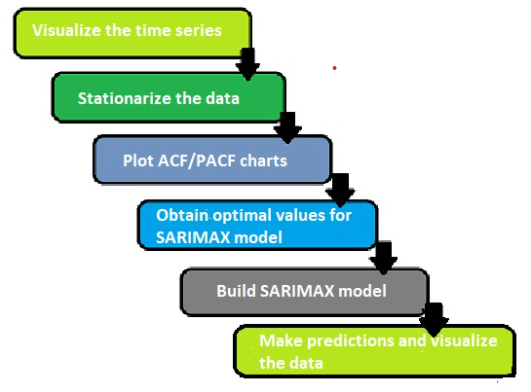

# Visualizing the Time Series data

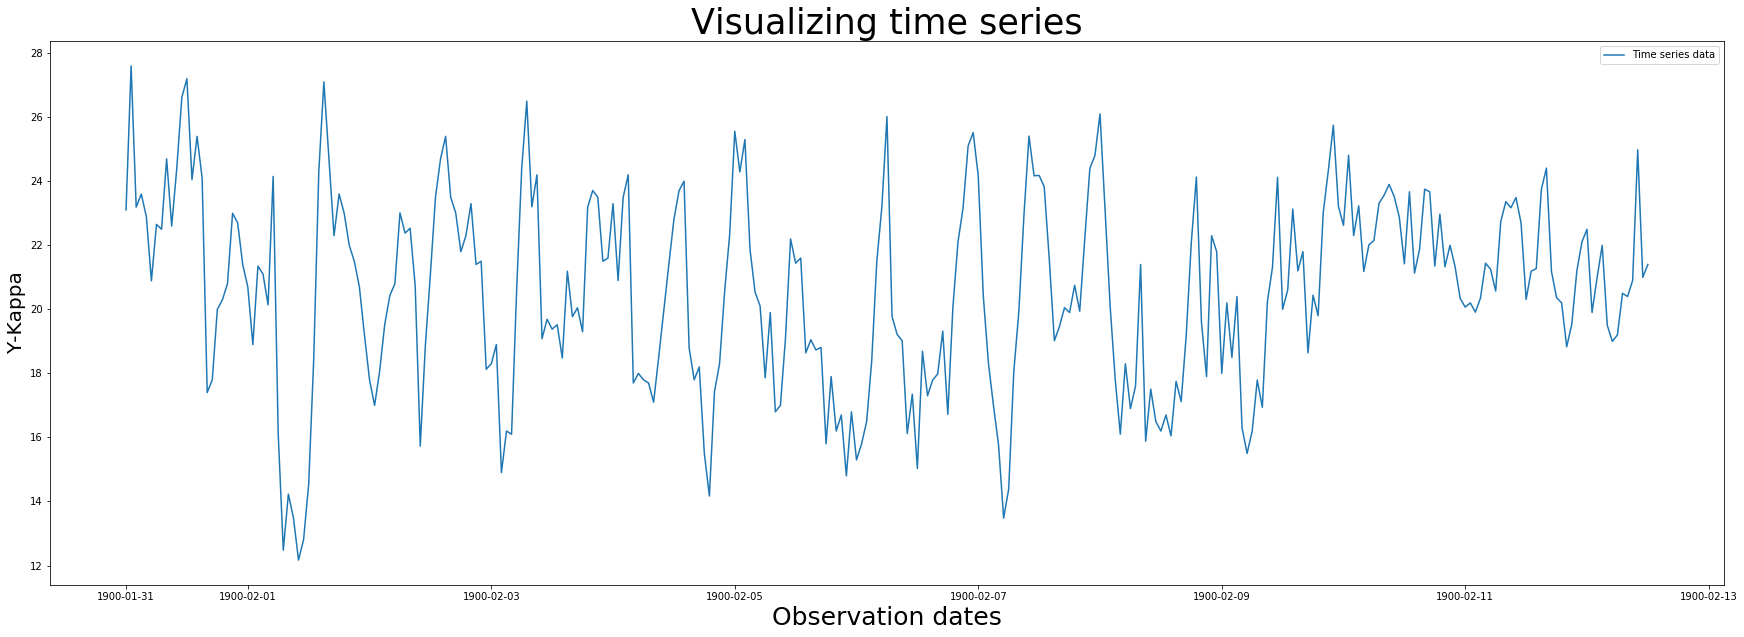

In [131]:
#plotting time series data using matplotlib library

plt.figure(figsize=(30,10))
plt.plot(arima_data,label='Time series data')
plt.xlabel('Observation dates', fontsize=25)
plt.ylabel('Y-Kappa',fontsize=20)
#plt.xticks(arima_data.resample('D'))
plt.title('Visualizing time series',fontsize=35)
plt.legend()
plt.show()

# Visualizing patterns in the data

The Time Series data may be a combination of one or more of these factors. Understanding these factors will help us to identify patterns in the data. The patterns in Time Series data are



Trend: shows a long term increase or decrease in data

Seasonal: when the data is affected by seasonal factors

Cyclic: data shows fluctuations across any period of time

Random: If the above 3 components are missing in a data


These components are extracted by using the statsmodels package in python. Seasonal Decompose help us to find the patterns in data.



#### Visualizing the Trend component of time series data

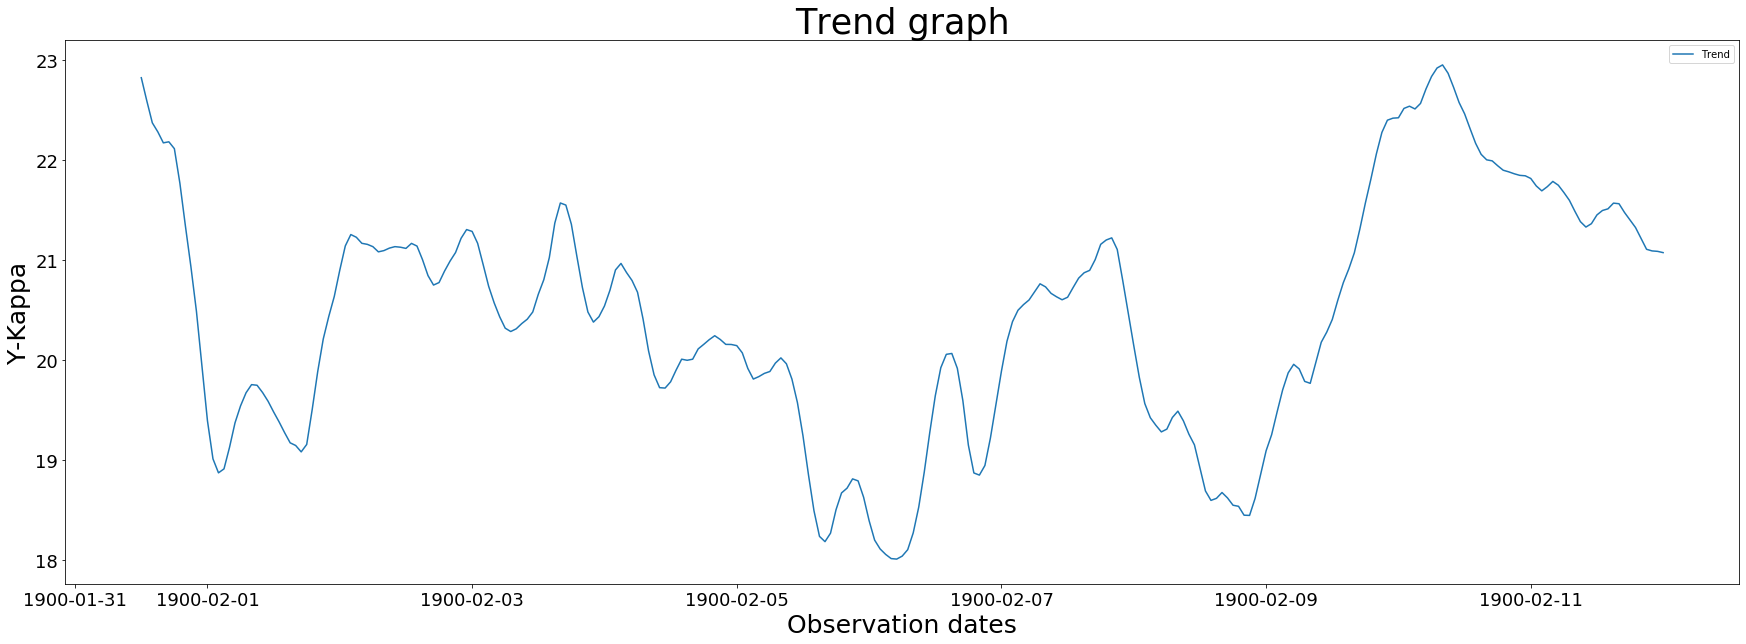

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(30,10))
plt.plot(seasonal_decompose(arima_data,period=24).trend,label='Trend') #Observing Trend over 24 hours 
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Trend graph',fontsize=35)
plt.legend()
plt.show()

From the graph we conclude that there is no observed trend in the graph.

#### Visualizing the Seasonal component of time series data

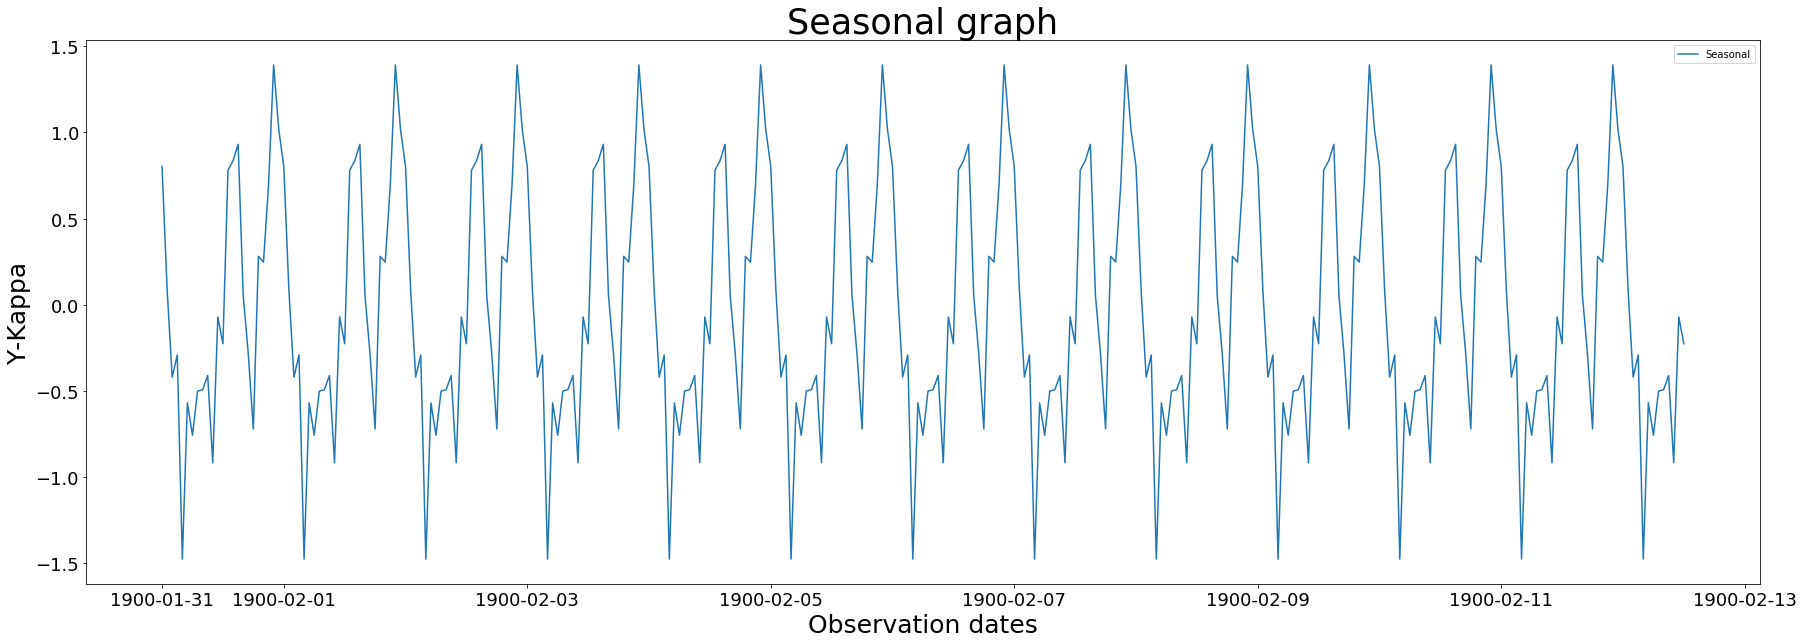

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(30,10))
plt.plot(seasonal_decompose(arima_data,period=24).seasonal,label='Seasonal')
#Seasonality is observed in the plot over the period of 24 hours
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Seasonal graph',fontsize=35)
plt.legend()
plt.show() 

From this graph, we can conclude there is seasonality for every 24 hours.

#### Visualizing the residual component of time series data

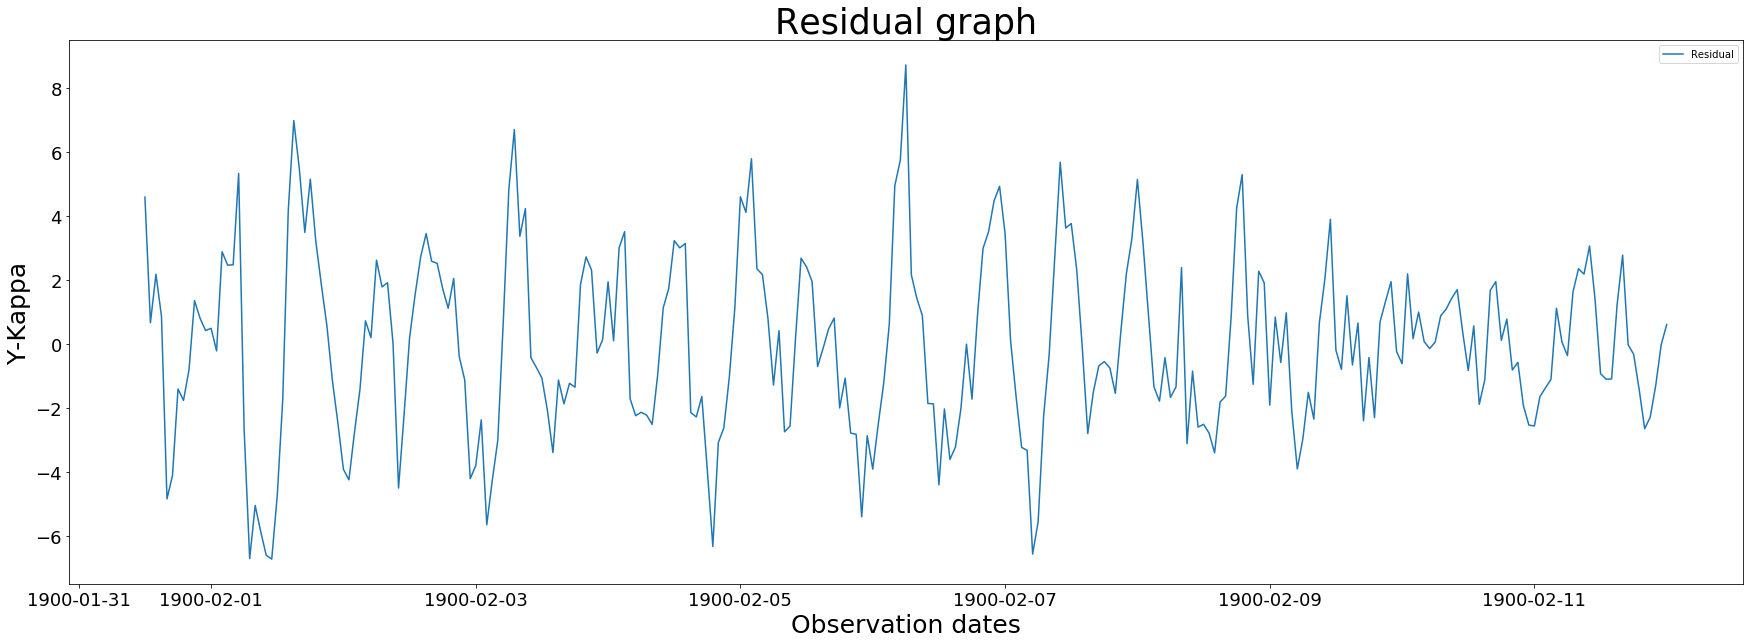

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
plt.figure(figsize=(30,10))
plt.plot(seasonal_decompose(arima_data,period=24).resid,label='Residual') 
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Residual graph',fontsize=35)
plt.legend()
plt.show()

The graph showing residual component of the Time Series data

#### Visualizing the observed component of time series data


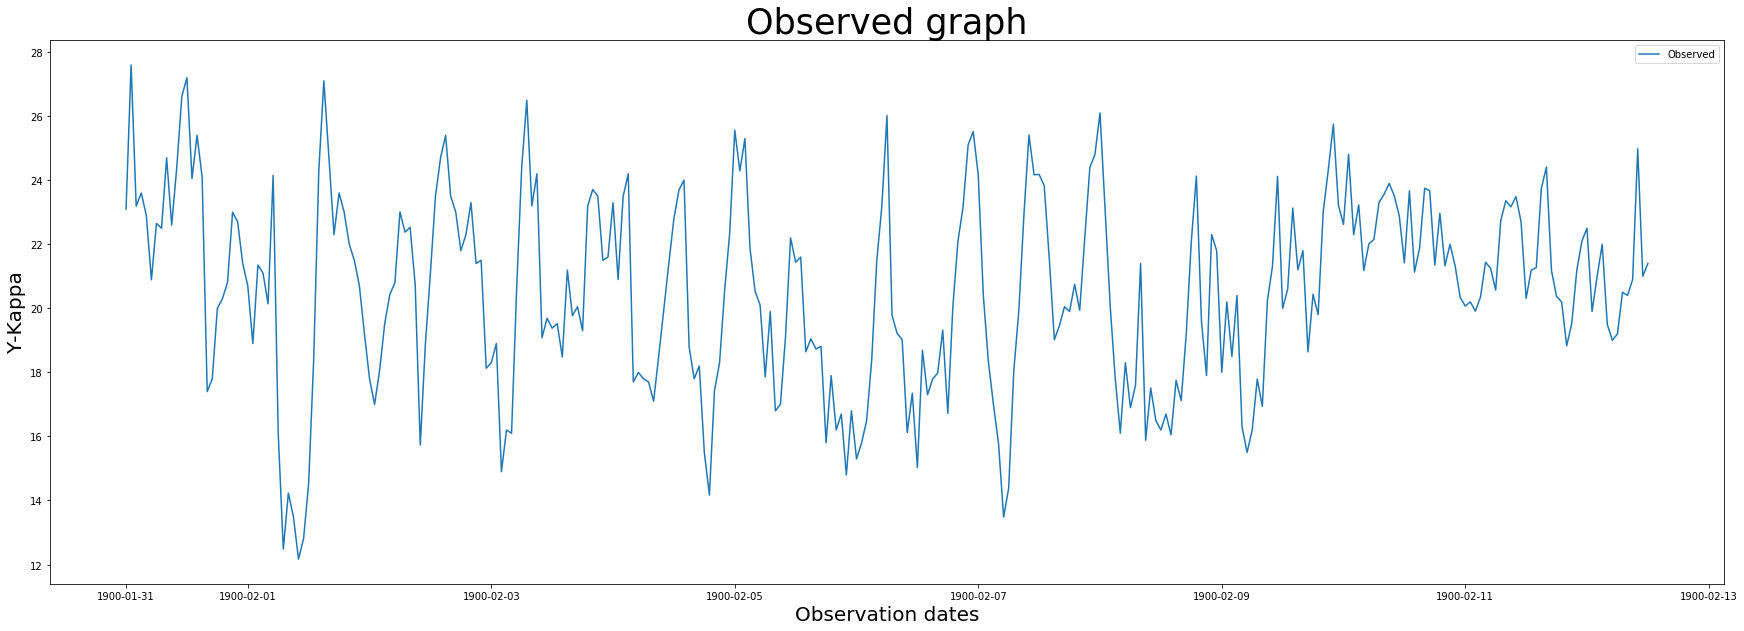

In [135]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(30,10))
plt.plot(seasonal_decompose(arima_data,period=24).observed,label='Observed') 
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Observed graph',fontsize=35)
plt.legend()
plt.show()

This graph represents the original Time Series data.

# Testing the stationarity of the time series data

We can check the stationarity of the series by using the Dickey-Fuller test. It uses hypothesis testing for checking the stationarity of a series as mentioned below.

Null Hypothesis : series is non-stationary

Alternate Hypothesis : series is stationary

If the null hypothesis is rejected, then the series is assumed to be stationary, where the p-value will be less than 0.05.

If we fail to reject null hypothesis, then the series is assumed to be non-stationary. We need to difference the variable and repeat the dickey-fuller test to see if the differenced variable is stationary.

In [137]:
from statsmodels.tsa.stattools import adfuller
def dffunc(arima_data):
    dftest = adfuller(arima_data, autolag='AIC')
    dfoutput = pd.Series([dftest[0],dftest[1], dftest[4]["5%"],dftest[5]], index=['Test Statistic','p-value', 'Critical Value at 5%','AIC'])
    print(dfoutput)
    return(dftest[1])

# p-value > 0.05: Fail to reject the null hypothesis (H0)-> it is not stationary
# p-value <= 0.05: Reject the null hypothesis (H0) -> it is stationary
p_value=dffunc(arima_data)
if p_value<=0.05:
    print("\np-value <= 0.05 : It is stationary")
else:
    print("\np-value > 0.05 : It is not stationary")

Test Statistic         -7.847721e+00
p-value                 5.709667e-12
Critical Value at 5%   -2.871321e+00
AIC                     1.180963e+03
dtype: float64

p-value <= 0.05 : It is stationary


Here the p-value is less than 0.05 and we reject the Null Hypothesis and conclude the data is stationary. Hence, there is no need to do differencing. So the value of d=0

# Plotting ACF and PACF Plots

### Autocorrelation plot

ACF is an auto-correlation function which gives us value q of any series based on lagged values. We can plot ACF plot by using statsmodels package in python

<Figure size 2160x720 with 0 Axes>

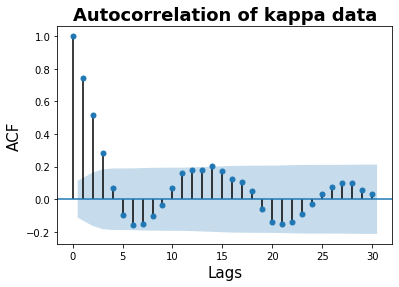

In [138]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(30,10))
plot_acf(arima_data, lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of kappa data', fontsize=18, weight='bold')
plt.show()
# By visualizing the graph, we can find the q value based on lags.
# We name the spikes with index starting from 0. We will select the first spike as q value based on either of the two conditions.
# Condition 1 is the spike must be completely inside the shaded region.
# Condition 2 is that the blue dot of spike must touch the shaded region and the line must be in the shaded region.
# The spike with index name 4 satisfies the one of the above condition. So, the q value is 4.

        From above graph, we can get q value is 4

### Partial Autocorrelation plot

The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself. We can plot ACF plot by using statsmodels package in python

PACF plot is used to identify the value of p.

<Figure size 2160x720 with 0 Axes>

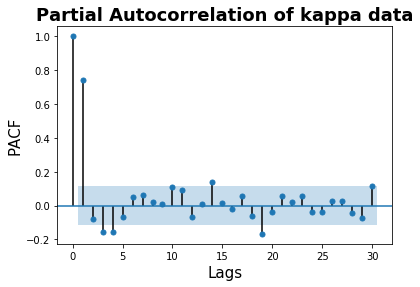

In [139]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(30,10))
plot_pacf(arima_data, lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('PACF', fontsize=15)
plt.title('Partial Autocorrelation of kappa data', fontsize=18, weight='bold')
plt.show()
# By visualizing the graph, we can find the p value based on lags.
# We name the spikes with index starting from 0. We will select the first spike as p value based on either of the two conditions.
# Condition 1 is the spike must be completely inside the shaded region.
# Condition 2 is that the blue dot of spike must touch the shaded region and the line must be in the shaded region.
# The spike with index name 4 satisfies the one of the above condition. So, the p value is 2.

        From above graph, we can get p value is 2

After finding the patterns of this Time Series data. We can clearly observe the seasonality component in the data over 24 hours. As seasonality is present in data, we will implement SARIMAX model

# Time series forecasting with SARIMAX

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

Parameters in SARIMAX function

    p: Trend autoregression order.
    d: Trend difference order.
    q: Trend moving average order.

There are four seasonal elements.They are:

    P: Seasonal autoregressive order.
    D: Seasonal difference order.
    Q: Seasonal moving average order.
    s: The number of time steps for a single seasonal period.

The notation for an SARIMA model is specified as:
SARIMA(p,d,q)(P,D,Q)s


### Finding optimal values for SARIMAX model

Finding the parameters manually can be challenging sometimes, therefore we create different models on a range of parameters and gets the best parameters based on AIC/BIC value.

Generating different combinations for p,d,q and P,D,Q using itertools package in python

In [140]:
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q)) # Generating different combinations for p,d,q using 0,1
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))] # Genrating differnert combinations for P,D,Q,S
# 24 repesents the seasonality factor(24 hour data)

Here, we are finding optimal values using AIC values

AIC: The Akaike Information Critera (AIC) is a widely used to measure of a statistical model. It basically quantifies

    1) the goodness of fit, and 
    2) the simplicity/parsimony, of the model into a single statistic.

When comparing two models, the one with the lower AIC is generally “better”.

In [141]:
ans=[] 
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(arima_data,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
            ans.append([param, param_seasonal, results.aic])
# AIC used to get a best fit value based on data
# we find optimal value from the output which has lower value of AIC
# As lower the AIC value we get best optimal value

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:2673.6432033982237
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:2184.9798473072997
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:1594.815377966339
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:1286.0812048133012
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:1596.1032577238802
ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:1464.1632446206584
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:1364.3693005126056
ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:1325.6845358967637
ARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:2300.466785204509
ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:1905.2501645824377
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:1442.1938807926313
ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:1158.6186852048475
ARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:1451.2723730286802
ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:1309.1172576792555
ARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:1238.08261329637
ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:1188.7189690717819
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:1303.4852019439236
ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:1198.7980563242

Finding the optimum p,d,q and P,D,Q values based on AIC. The one which has least AIC is considered

In [143]:
#we take parameter values based on least AIC value. 
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'AIC'])
ans_df = ans_df.sort_values(by=['AIC'],ascending=True) # sort the list based on AIC value in ascending order
pdq=ans_df.iloc[0,0] # get value for p,d,q
pdqs=ans_df.iloc[0,1] # get value for P,D,Q,S
print("p,d,q : ",pdq,"\nP,D,Q,S : ",pdqs,"\nAIC : ",ans_df.iloc[0,2])

p,d,q :  (1, 0, 1) 
P,D,Q,S :  (0, 1, 1, 24) 
AIC :  1095.1124298596906


### Implementing SARIMAX model

#### Splitting the train and test data

Here, we split the data into train and test data in the ratio 66:34

In [145]:
X = arima_data
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

#### Building model

We forecast each value for Y-Kappa based on the previous values and comparing with Test data

In [147]:
original = [x for x in train.values]
predictions = list() # Empty list

# We will find predicted data for every test data
for t in range(len(test)):
    # It has seasonal data so, we use SARIMAX model
    model = sm.tsa.statespace.SARIMAX(original,order=pdq,seasonal_order=pdqs,enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    output = model_fit.forecast() #predicts the value
    yvar = output[0]
    predictions.append(yvar) # Adding predicted value to the list
    obs = test.iloc[t]
    original.append(obs) # Adding actual value to original list
    print('predicted=%f, expected=%f' % (yvar, obs))


predicted=19.211545, expected=16.900000
predicted=17.280871, expected=17.600000
predicted=18.107451, expected=21.400000
predicted=21.703574, expected=15.880000
predicted=15.608257, expected=17.510000
predicted=19.566511, expected=16.500000
predicted=17.559437, expected=16.200000
predicted=18.410965, expected=16.700000
predicted=17.747070, expected=16.050000
predicted=16.932731, expected=17.750000
predicted=17.543955, expected=17.120000
predicted=18.000253, expected=19.200000
predicted=18.460087, expected=22.090000
predicted=22.764949, expected=24.130000
predicted=23.534139, expected=19.600000
predicted=20.072662, expected=17.900000
predicted=19.008717, expected=22.300000
predicted=22.597287, expected=21.800000
predicted=21.864097, expected=18.000000
predicted=17.012805, expected=20.200000
predicted=20.045528, expected=18.500000
predicted=18.397438, expected=20.400000
predicted=19.454971, expected=16.300000
predicted=17.573426, expected=15.500000
predicted=16.551020, expected=16.200000


Creating a DataFrame for the prediction values of Test Data

In [149]:
prediction=pd.DataFrame(predictions,index=test.index,columns=['Y-Kappa'])
prediction

,Y-Kappa
Observation,
1900-02-08 06:00:00,19.211545
1900-02-08 07:00:00,17.280871
1900-02-08 08:00:00,18.107451
1900-02-08 09:00:00,21.703574
1900-02-08 10:00:00,15.608257
...,...
1900-02-12 08:00:00,20.687855
1900-02-12 09:00:00,20.311294
1900-02-12 10:00:00,20.584395


#### Visualizing Actual data vs Predicted data for Test data

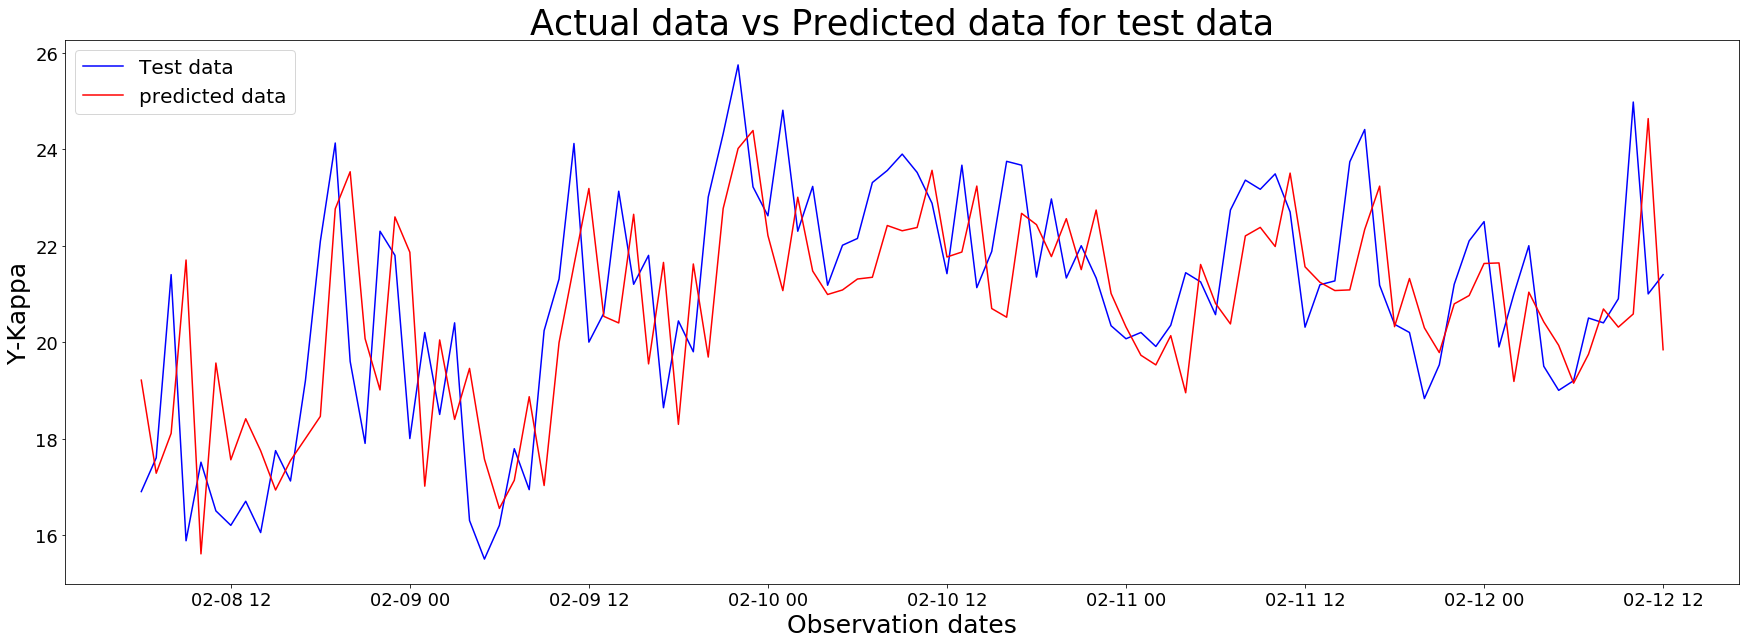

In [150]:
plt.figure(figsize=(30,10))
plt.plot(test,color='blue',label='Test data')
plt.plot(prediction, color='red',label='predicted data')
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Actual data vs Predicted data for test data',fontsize=35)
plt.legend(prop={'size': 20})
plt.show()

From the above graph, we can conclude that there is no large variation between Actual data vs Predicted data

#### Visualizing the Prediction of Time Series data

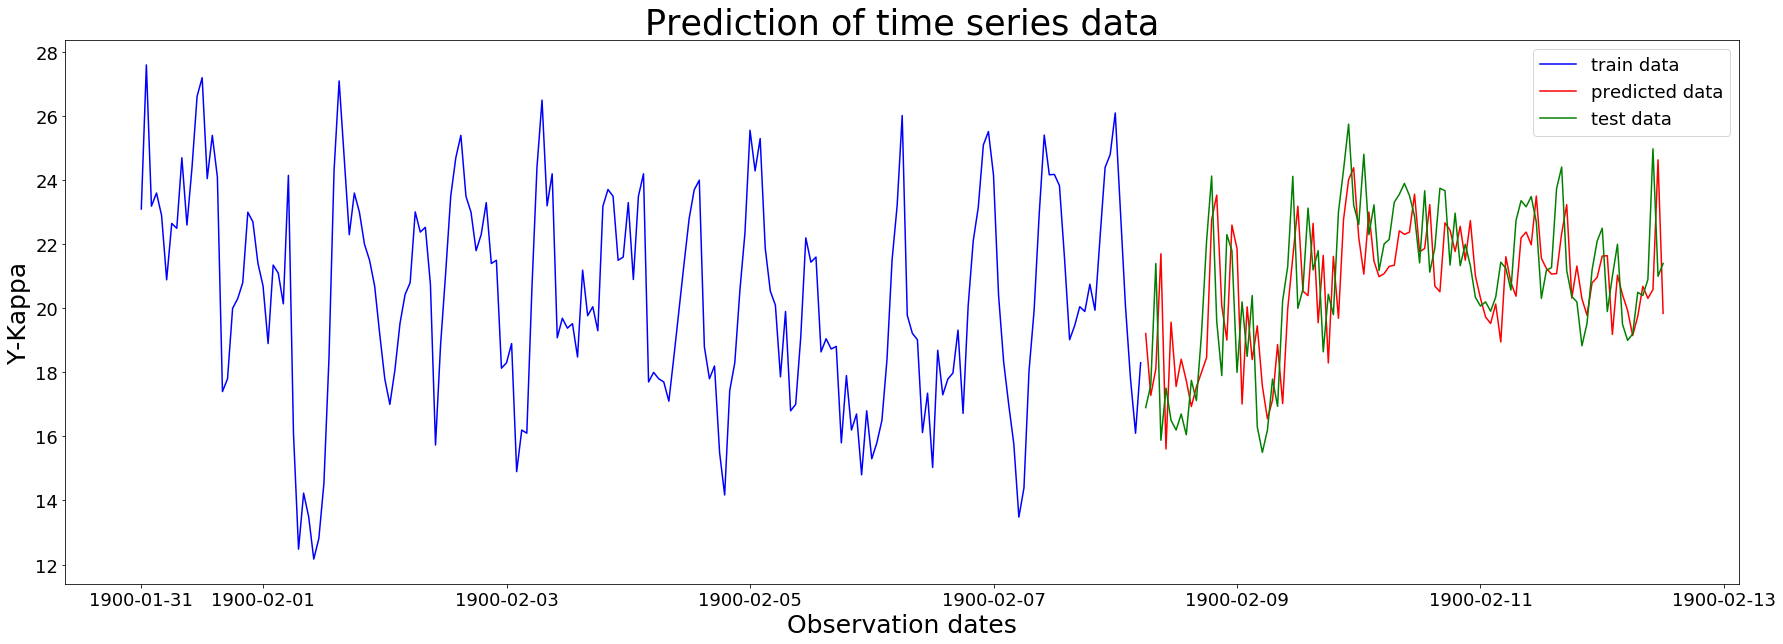

In [151]:
plt.figure(figsize=(30,10))
plt.plot(train,color='blue',label='train data')
plt.plot(prediction, color='red',label='predicted data')
plt.plot(test,color='green',label='test data')
plt.xlabel('Observation dates',fontsize=25)
plt.ylabel('Y-Kappa',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Prediction of time series data',fontsize=35)
plt.legend(prop={'size': 18})
plt.show()

#### Finding Root Mean Square Error

We use RMSE to find the performance of the current model.

In [152]:
rmse = np.sqrt(mean_squared_error(test,prediction))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.944


## COMPARING REGRESSION MODELS WITH TIME SERIES MODEL

Here we are comparing performance of our regression models with time series model using "Root Mean Square Error".



                     MODEL1            RMSE
                    -------           ------

         Regression Model-1          1.597812

         Regression Model-2          0.112000

         Regression Model-3          0.563998

         SARIMAX Model               1.944000

## Conclusion

Here we built three regression models and one SARIMA model. Among all SARIMA model have more RMSE value. So we conclude that regression models predicts "Y-Kappa" accurately when compared to SARIMA model